In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# 1. PRE-PROCESSING

In [2]:
# Load the file
data_directory = 'C:/Users/Mihail/Desktop/University/MIS 776 - Business Intelligence/(2)Project Files/'
file_name = 'body_performance.csv'
data_path = os.path.join(data_directory, file_name)
data_frame = pd.read_csv('bodyPerformance.csv')

In [3]:
# Display the first 5 rows
# class = body performance (A, B, C, D)
pd.options.display.max_columns = None
data_frame.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [4]:
print("The shape of the dataframe is:", data_frame.shape) # (n_instances, n_features)

The shape of the dataframe is: (13393, 12)


In [5]:
print("General Information of the data set: \n")
data_frame.info()

General Information of the data set: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
print("The number of unique values per column: \n", data_frame.nunique())

The number of unique values per column: 
 age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64


In [7]:
print("The unique values in a selected column are: \n", data_frame['gender'].unique())

The unique values in a selected column are: 
 ['M' 'F']


In [8]:
print("The counts per unique value are: \n", data_frame["gender"].value_counts())

The counts per unique value are: 
 M    8467
F    4926
Name: gender, dtype: int64


In [9]:
# Drop any rows that have NA values
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

data_frame.dropna(how='any', inplace=True) 
print("The info of the data set: \n")
data_frame.info() # no na values

The info of the data set: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


# 2. EXPLORATORY DATA ANALYSIS

In [9]:
# Basic statistics summary
data_frame.describe().round(2)

age  height_cm  weight_kg  body fat_%  diastolic  systolic  \
count  13393.00   13393.00   13393.00    13393.00   13393.00  13393.00   
mean      36.78     168.56      67.45       23.24      78.80    130.23   
std       13.63       8.43      11.95        7.26      10.74     14.71   
min       21.00     125.00      26.30        3.00       0.00      0.00   
25%       25.00     162.40      58.20       18.00      71.00    120.00   
50%       32.00     169.20      67.40       22.80      79.00    130.00   
75%       48.00     174.80      75.30       28.00      86.00    141.00   
max       64.00     193.80     138.10       78.40     156.20    201.00   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
count   13393.00                 13393.00        13393.00       13393.00  
mean       36.96                    15.21           39.77         190.13  
std        10.62                     8.46           14.28          39.87  
min         0.00                   -25.00            0.00           0.00  
25%        27.50                    10.90           30.00         162.00  
50%        37.90                    16.20           41.00         193.00  
75%        45.20                    20.70           50.00         221.00  
max        70.50                   213.00           80.00         303.00

# Aggregating by target variable (body performance) 

Youngest people have the highest performance. Similar height across all classes. The heavier, the worst is the performance. The lower the body fat %, the better is the performance. Similar lower and upper level blood pressure. The stronger the grip force, the better is the performance. Similarly for the last 3 metrics.

In [10]:
# Aggregating the numerical metrics by "Class"
data_frame.groupby("class").mean().round(2)

age  height_cm  weight_kg  body fat_%  diastolic  systolic  \
class                                                                 
A      35.27     167.87      64.42       20.54      77.90    129.29   
B      37.07     168.58      66.61       22.04      78.66    130.64   
C      36.70     169.16      66.76       22.64      78.55    129.93   
D      38.06     168.63      72.00       27.74      80.08    131.08   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
class                                                                     
A          38.62                    21.39           47.85         202.74  
B          37.91                    17.47           42.64         195.33  
C          36.58                    14.39           38.72         188.63  
D          34.75                     7.59           29.88         173.82

In [11]:
# Kurtosis - a measure of whether the data is heavy-tailed or light-tailed relative to a normal distribution
# Data with high kurtosis tends to have heavy tails, or outliers. Data with low kurtosis tends to have light tails,
# or lack of outliers.

# notice the high value of the sit and bend forward_cm (mean = 15.21 but max = 213)
data_frame.kurt().round(2)

age                        -1.02
height_cm                  -0.43
weight_kg                   0.17
body fat_%                  0.13
diastolic                   0.36
systolic                    0.38
gripForce                  -0.82
sit and bend forward_cm    35.22
sit-ups counts             -0.16
broad jump_cm               0.00
dtype: float64

In [12]:
# Skewness - a measure of symmetry, or the lack of symmetry.The skewness for a normal distribution is zero, and any 
# symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and 
# positive values for the skewness indicate data that are skewed right.
 
data_frame.skew().round(2)

age                        0.60
height_cm                 -0.19
weight_kg                  0.35
body fat_%                 0.36
diastolic                 -0.16
systolic                  -0.05
gripForce                  0.02
sit and bend forward_cm    0.79
sit-ups counts            -0.47
broad jump_cm             -0.42
dtype: float64

In [13]:
# Define features lists for the features
numerical_features = ["age", 'height_cm', "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", 
                      "sit and bend forward_cm", "sit-ups counts", "broad jump_cm"]
categorical_features = ["gender", "class"]

In [14]:
# Define a custom function for plotting histograms of the features
def describe_feature(feature_name, 
                     bins=30, 
                     edgecolor='k', 
                     **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    data_frame[feature_name].hist(bins=bins, 
                                  edgecolor=edgecolor, 
                                  ax=ax, 
                                  **kwargs)
    ax.set_title(feature_name, size=15)

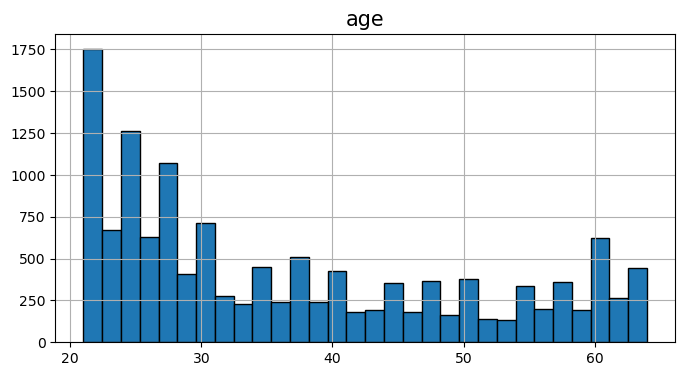

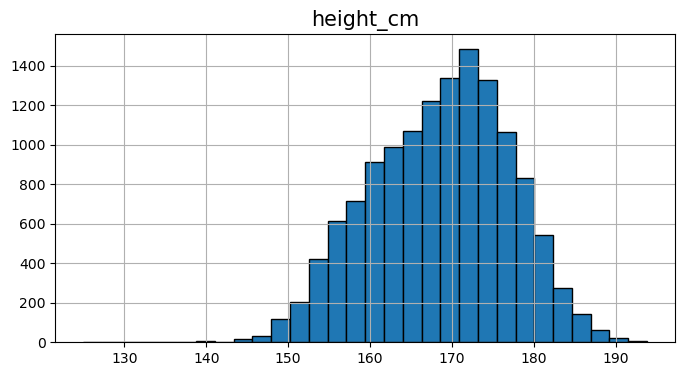

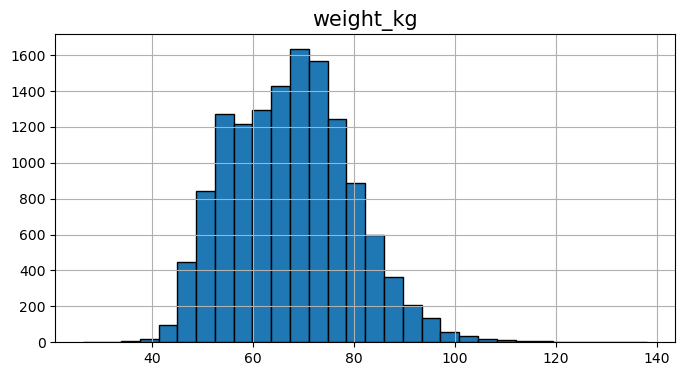

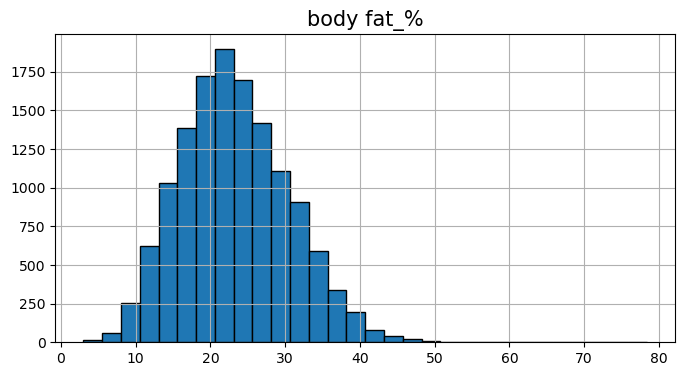

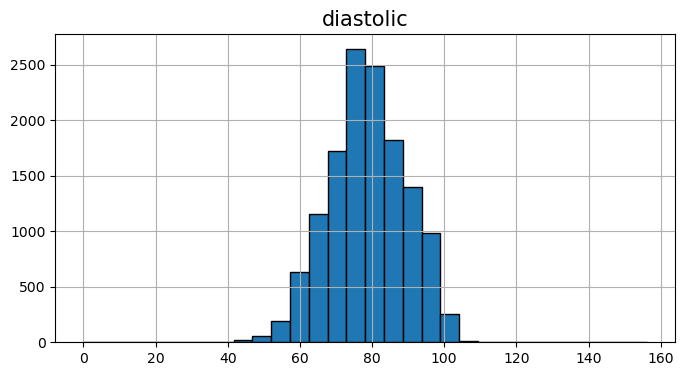

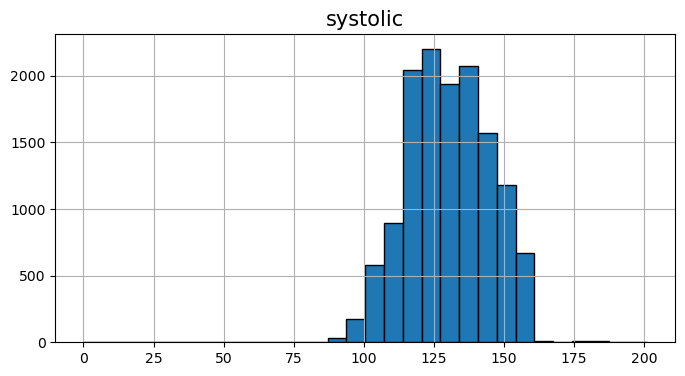

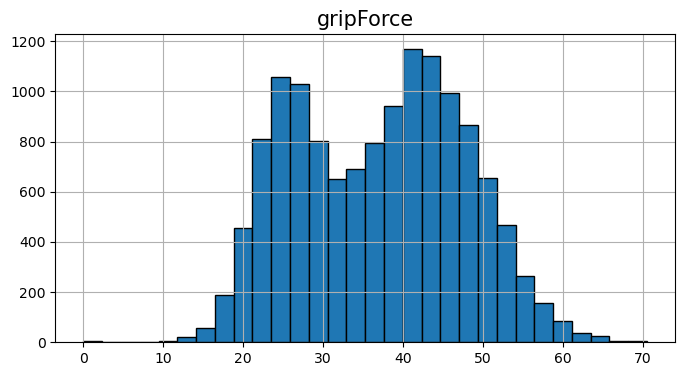

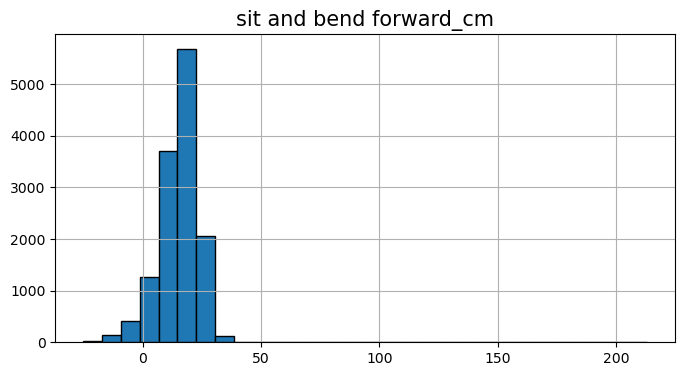

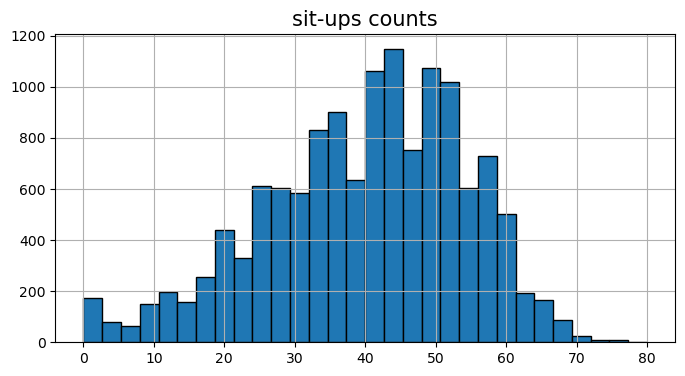

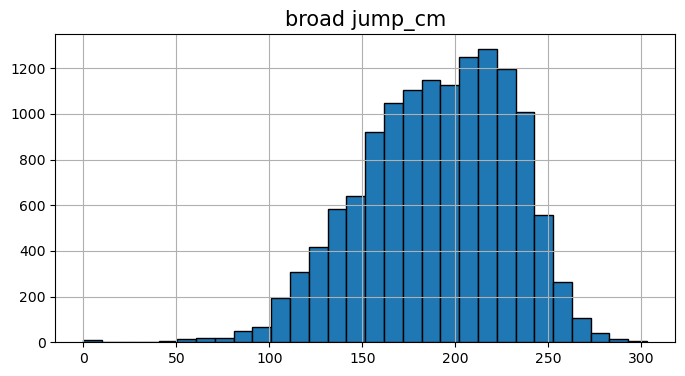

In [16]:
# Visualize the distribution of each numerical feature 

for i in numerical_features:
    describe_feature(i)

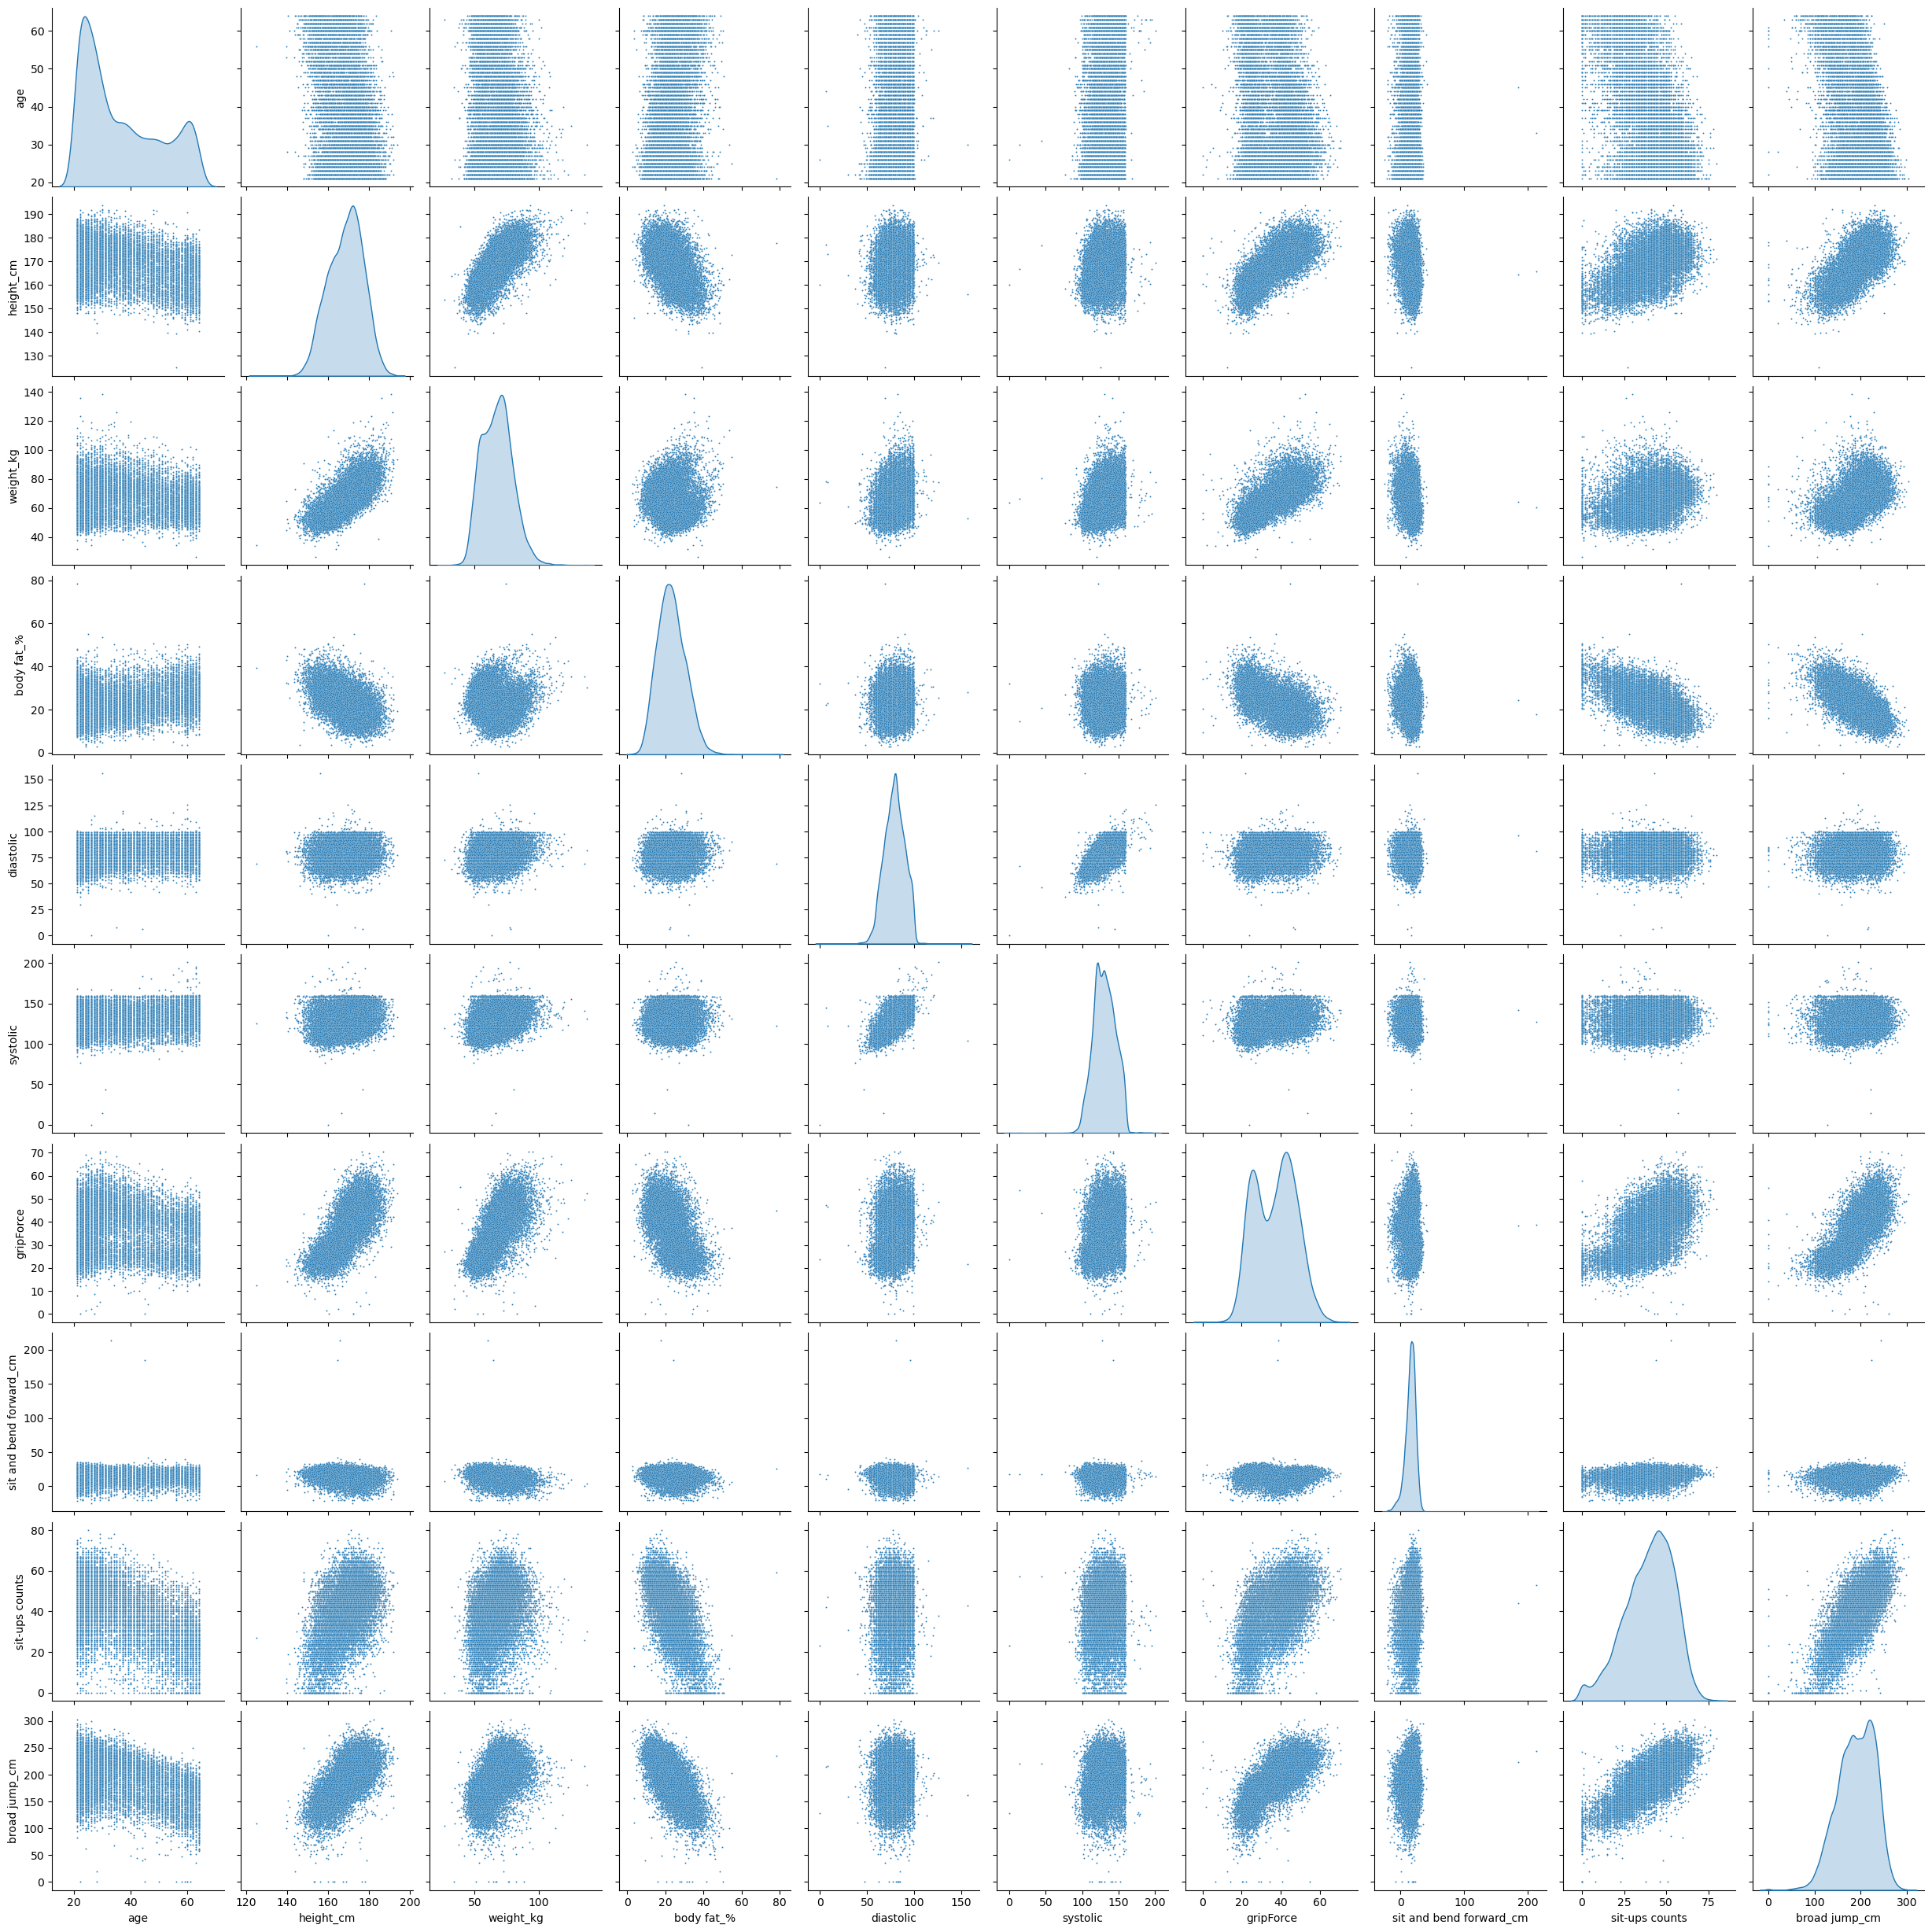

In [17]:
# Correlation plots between the numerical features
sns.pairplot(data_frame[numerical_features], 
             plot_kws={"s": 2}, 
             diag_kind='kde')

In [18]:
# Calculate Pearson correlation coeffiecients between the numerical values
data_frame[numerical_features].corr()

age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.293980  -0.099966    0.242302   
height_cm               -0.293980   1.000000   0.734909   -0.515440   
weight_kg               -0.099966   0.734909   1.000000   -0.084065   
body fat_%               0.242302  -0.515440  -0.084065    1.000000   
diastolic                0.158508   0.145933   0.262317    0.048059   
systolic                 0.211167   0.210186   0.338943   -0.030376   
gripForce               -0.179583   0.735024   0.700119   -0.541788   
sit and bend forward_cm -0.070033  -0.221970  -0.296249   -0.071225   
sit-ups counts          -0.544581   0.500424   0.294899   -0.608912   
broad jump_cm           -0.435172   0.674589   0.479564   -0.673273   

                         diastolic  systolic  gripForce  \
age                       0.158508  0.211167  -0.179583   
height_cm                 0.145933  0.210186   0.735024   
weight_kg                 0.262317  0.338943   0.700119   
body fat_%                0.048059 -0.030376  -0.541788   
diastolic                 1.000000  0.676309   0.202062   
systolic                  0.676309  1.000000   0.286012   
gripForce                 0.202062  0.286012   1.000000   
sit and bend forward_cm  -0.072098 -0.082434  -0.112577   
sit-ups counts            0.016547  0.056276   0.576669   
broad jump_cm             0.097243  0.152894   0.746853   

                         sit and bend forward_cm  sit-ups counts  \
age                                    -0.070033       -0.544581   
height_cm                              -0.221970        0.500424   
weight_kg                              -0.296249        0.294899   
body fat_%                             -0.071225       -0.608912   
diastolic                              -0.072098        0.016547   
systolic                               -0.082434        0.056276   
gripForce                              -0.112577        0.576669   
sit and bend forward_cm                 1.000000        0.177153   
sit-ups counts                          0.177153        1.000000   
broad jump_cm                           0.026487        0.748273   

                         broad jump_cm  
age                          -0.435172  
height_cm                     0.674589  
weight_kg                     0.479564  
body fat_%                   -0.673273  
diastolic                     0.097243  
systolic                      0.152894  
gripForce                     0.746853  
sit and bend forward_cm       0.026487  
sit-ups counts                0.748273  
broad jump_cm                 1.000000

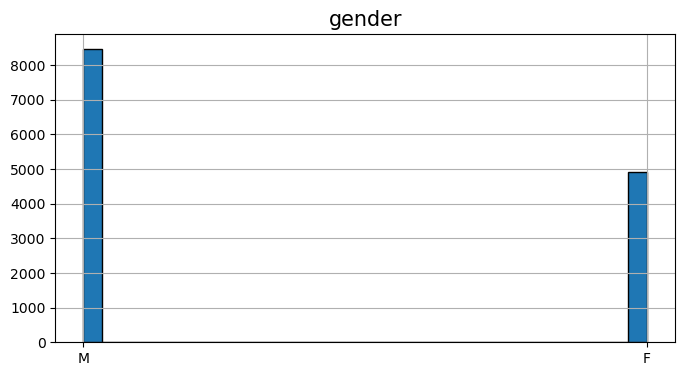

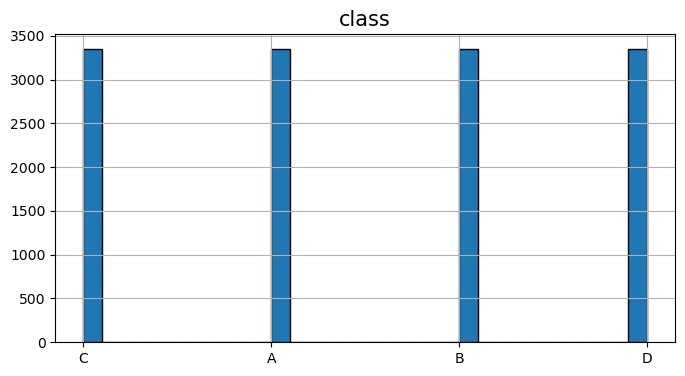

In [19]:
# Visualize the distribution of each categorical variable

for i in categorical_features:
    describe_feature(i)

# 2.1 One hot encoding on the categorical variables

In [20]:
# The uniques values in the "gender" feature
data_frame['gender'].unique()

array(['M', 'F'], dtype=object)

In [21]:
# Re-coding the categorical "gender" feature. Drop one of the vectors to prevent multi-collinearity 
gender_col = pd.get_dummies(data_frame["gender"], 
                            prefix="gender_pre", 
                            drop_first=True)
gender_col.tail()

gender_pre_M
13388             1
13389             1
13390             1
13391             0
13392             1

In [22]:
# Run once because gender_coded column is being re-added with each run.

# Combine the data_frame with the new gender column, drop the old gender column.
# Male == 1, Female == 0
data_frame = pd.concat([data_frame, gender_col], axis=1)
data_frame.rename(columns={"gender_pre_M": 'Gender'}, inplace = True)
data_frame.drop(['gender'], inplace=True, axis=1)
data_frame.head()

age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0  27.0      172.3      75.24        21.3       80.0     130.0       54.9   
1  25.0      165.0      55.80        15.7       77.0     126.0       36.4   
2  31.0      179.6      78.00        20.1       92.0     152.0       44.8   
3  32.0      174.5      71.10        18.4       76.0     147.0       41.4   
4  28.0      173.8      67.70        17.1       70.0     127.0       43.5   

   sit and bend forward_cm  sit-ups counts  broad jump_cm class  Gender  
0                     18.4            60.0          217.0     C       1  
1                     16.3            53.0          229.0     A       1  
2                     12.0            49.0          181.0     C       1  
3                     15.2            53.0          219.0     B       1  
4                     27.1            45.0          217.0     B       1

In [23]:
# proportion of males
np.mean(data_frame["Gender"])

0.6321959232434854

In [24]:
# Identify the unique target values
data_frame['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [25]:
# the number of target values; initial equal counts
data_frame["class"].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

# 2.2. Feature ranking with Logistic Regression and DTC

Run the dataset with some multi-classifiers to see base-line importance of the features. Features with values close to 0 may have insignificant effect on predicting the target variable. If the same features are given same low coefficient by the multi-classifiers then they may be potential candidates for dropping. Later, we would like to see how this data set performs with smaller number of features.

In [26]:
# import some multi-classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# define data frames with features and a target variable
x = data_frame[ ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", 
                 "sit and bend forward_cm","sit-ups counts", "broad jump_cm", "Gender"] ]
y = data_frame["class"]

Logistic Regression picked 11 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Logistic Regression Model')

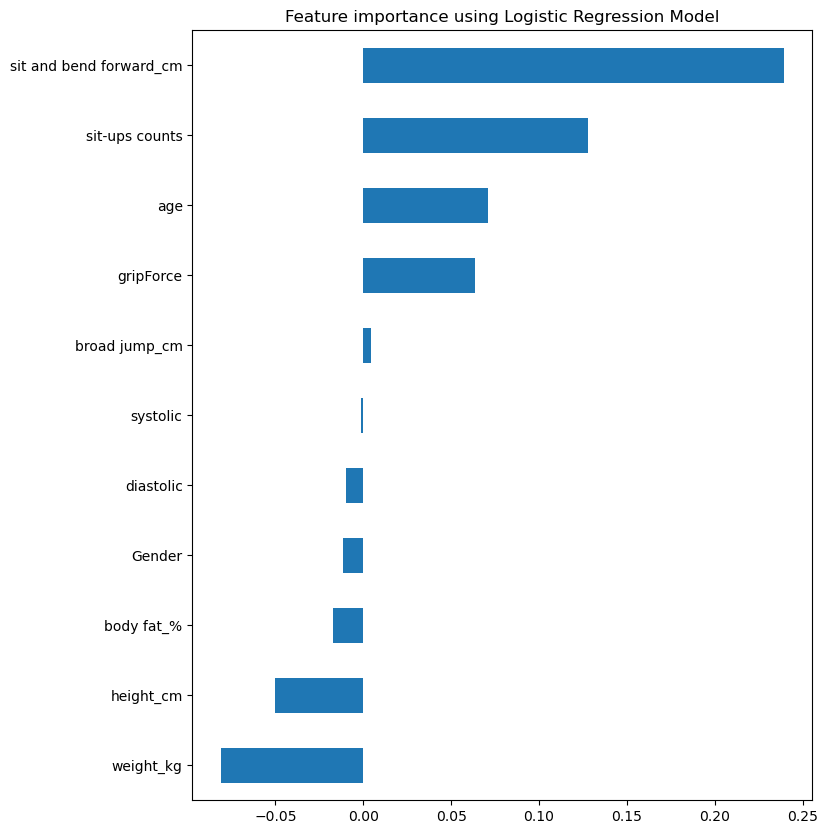

In [27]:
# Logistic regression for feature importance on the whole data set

model_log_reg = LogisticRegression(multi_class = "multinomial", random_state = 42)
model_log_reg.fit(x, y)
coef = pd.Series(model_log_reg.coef_[0], index = x.columns)
print("Logistic Regression picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Logistic Regression Model") 

DTC picked 11 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Decision Tree Classifier Model')

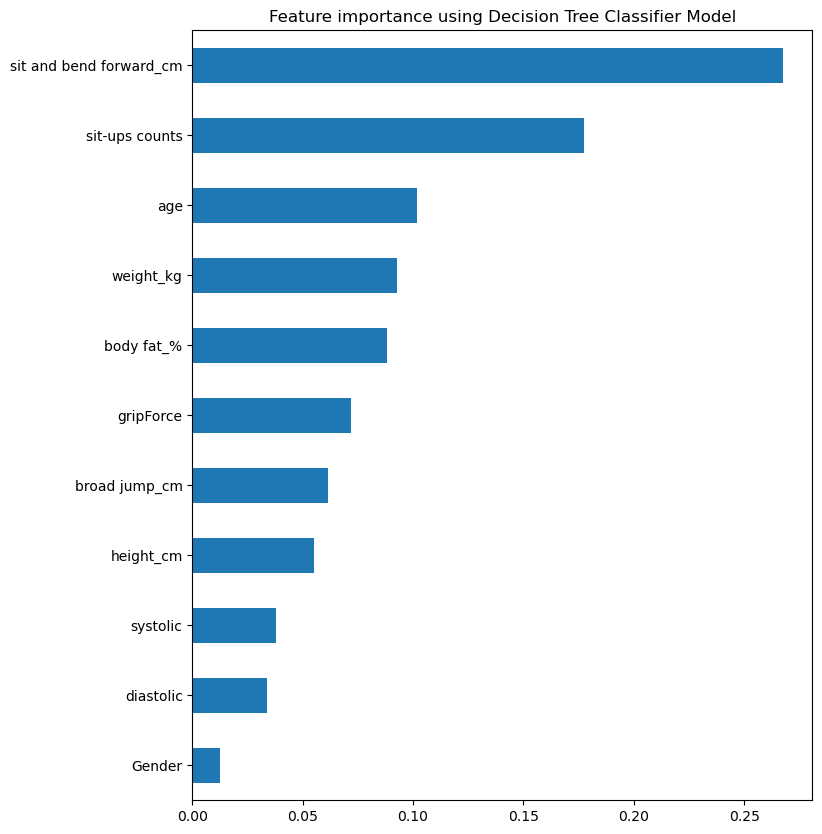

In [28]:
# Decision Tree Classifier for feature importance on the whole data set

model_decision_tc = DecisionTreeClassifier(random_state = 42)
model_decision_tc.fit(x, y)
coef = pd.Series(model_decision_tc.feature_importances_, 
                 index = x.columns)
print("DTC picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Decision Tree Classifier Model") 

RFC picked 11 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Random Forest Classifier Model')

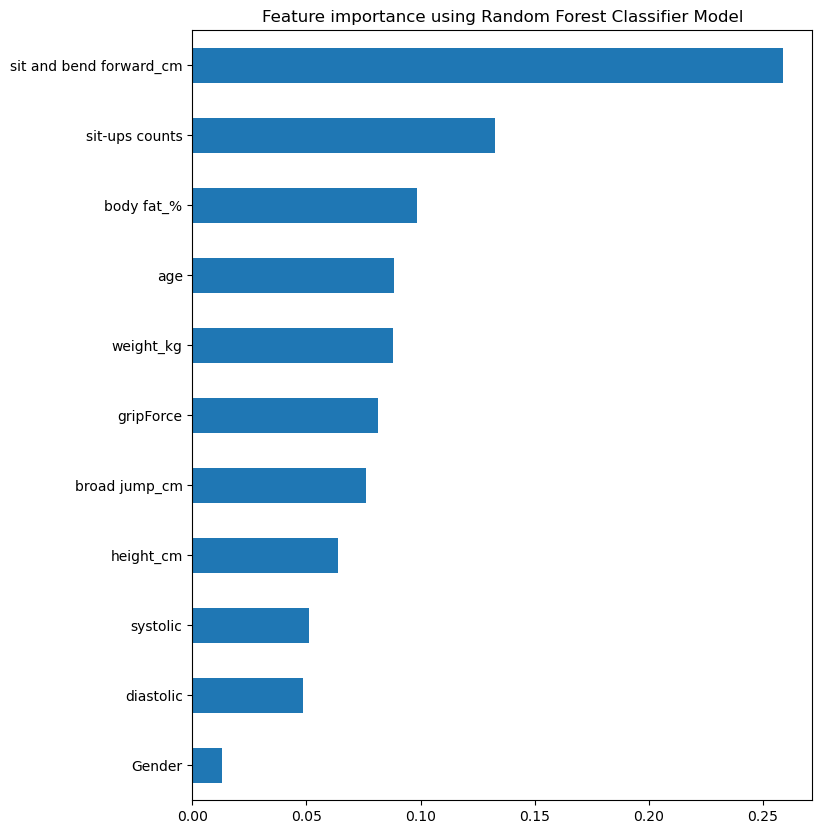

In [29]:
# Random Forest Classifier for feature importance on the whole data set

model_random_fc = RandomForestClassifier(random_state = 42)
model_random_fc.fit(x, y)
coef = pd.Series(model_random_fc.feature_importances_, 
                 index = x.columns)
print("RFC picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Random Forest Classifier Model") 

# Potential candidates for removal

In [30]:
# Features which are assigned coefficient values close to 0, are ranked low by all classifiers or 
# all have low coefficient values compared to the other.

# Logistic Regression: broad_jump_cm, diastolic, systolic, Gender, body_fat_% (ranked as the lowest values)

# Decision Tree Classifier: Gender, diastolic, systolic (ranked as the lowest values)

# Random Forest Classifier: Gender, diastolic, systolic (ranked as the lowest values)

# 2.3 Re-running Logistic Regression, DTC and RFC after dropping some features to see the values of the new coefficients

In [31]:
# drop Gender, diastolic, systolic
x = data_frame[ ["age", "height_cm", "weight_kg", "body fat_%", "gripForce", 
                 "sit and bend forward_cm","sit-ups counts", "broad jump_cm"] ]
y = data_frame["class"]

LR picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Logistic Regression Model')

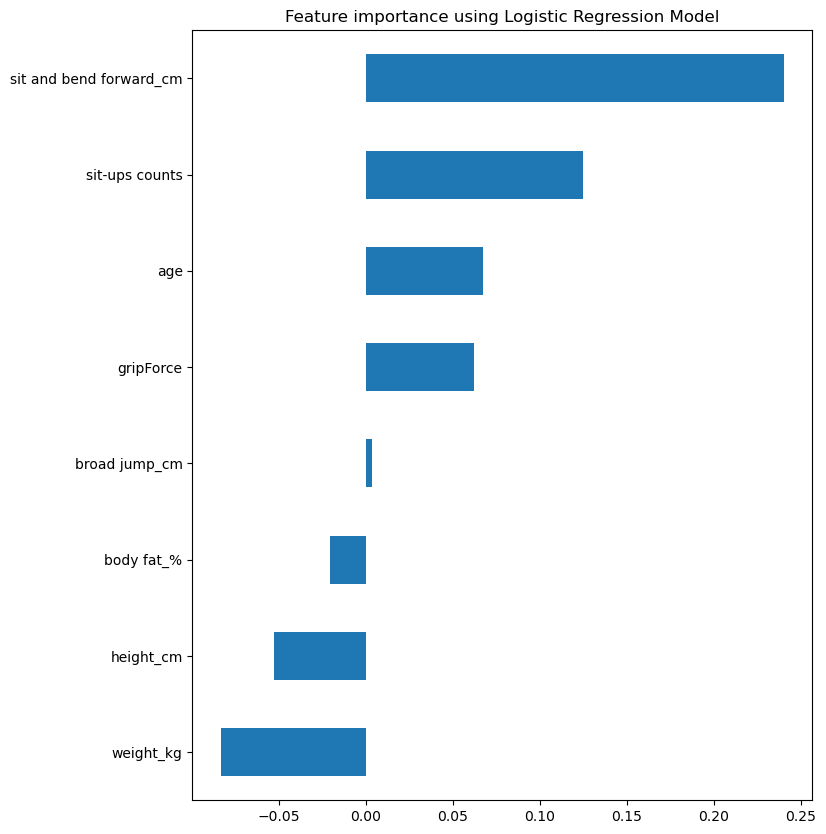

In [32]:
model_log_reg = LogisticRegression(multi_class = "multinomial",
                                   random_state = 42)
model_log_reg.fit(x, y)
coef = pd.Series(model_log_reg.coef_[0], index = x.columns)
print("LR picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Logistic Regression Model") 

DCT picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Decision Tree Classifier Model')

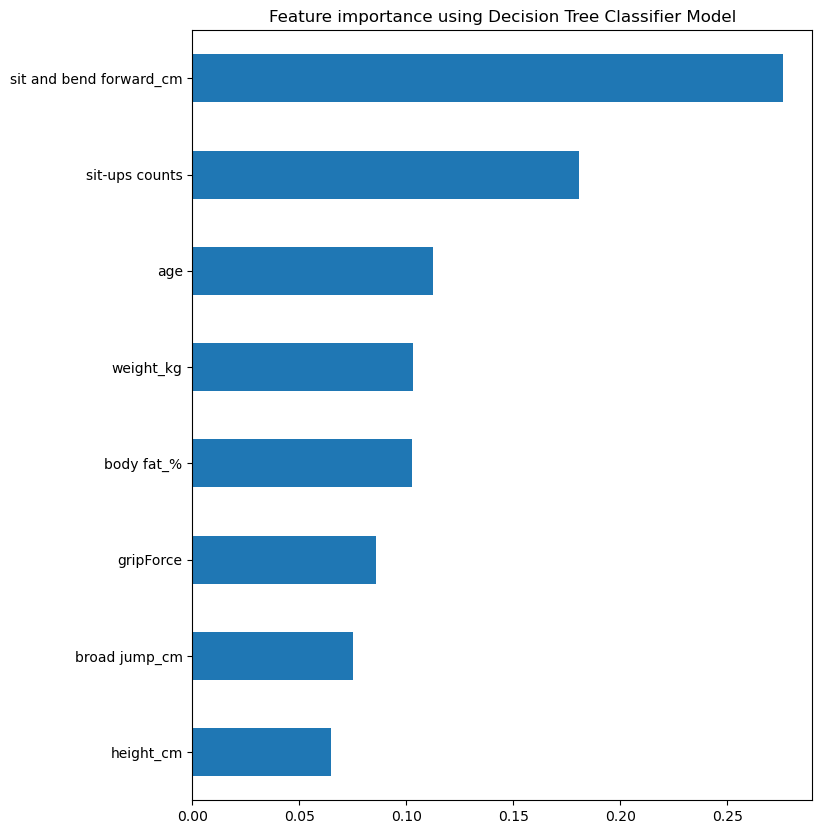

In [33]:
model_decision_tc = DecisionTreeClassifier(random_state = 42)
model_decision_tc.fit(x, y)
coef = pd.Series(model_decision_tc.feature_importances_, 
                 index = x.columns)
print("DCT picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Decision Tree Classifier Model") 

RFC picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Random Forest Classifier Model')

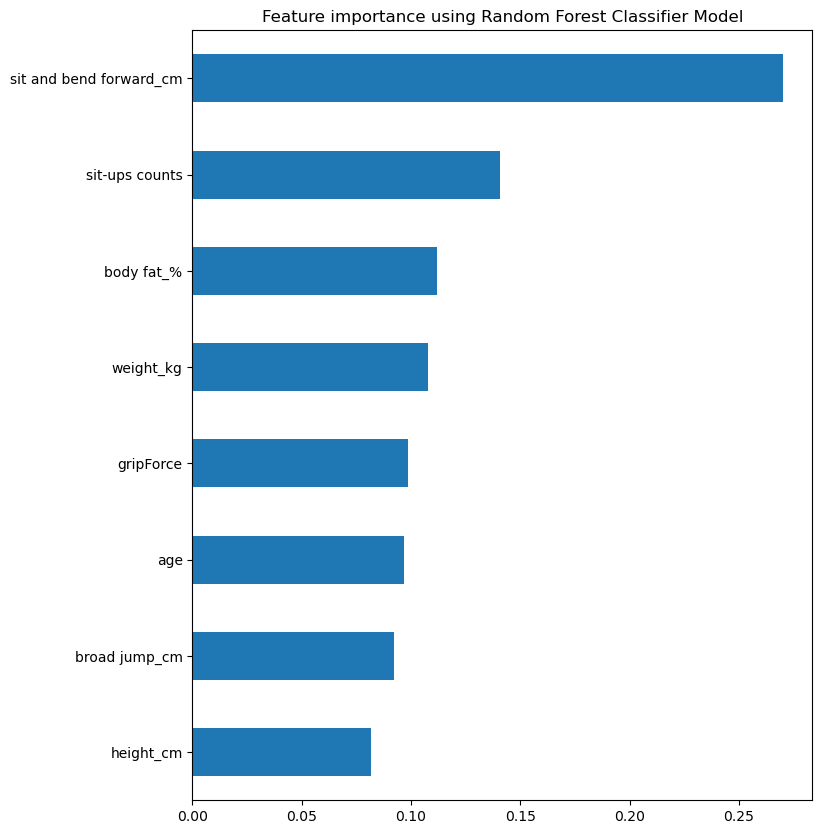

In [34]:
model_random_fc = RandomForestClassifier(random_state = 42)
model_random_fc.fit(x, y)
coef = pd.Series(model_random_fc.feature_importances_, 
                 index = x.columns)
print("RFC picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Random Forest Classifier Model") 

broad jump_cm ~ 0 (according to logistic regression re-run), but > 0.05 (according to DTC and RFC). Body performance was 
better with higher values of broad jump_cm, so let's leave it for now.

# 3. TRAINING DIFFERENT CLASSIFIER MODELS (using all x features)

Run multiple multi-classification algorithms to determine base-line performance. Looking for models that are able to over-fit (show enough complexity to learn data) as potential candidates, then do hyper-tuning to improve generalization on the test data. First using all x features, then do another training with dropped x features. Then, we compare performance.

In [35]:
from sklearn.model_selection import train_test_split

x = data_frame[ ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", 
                "sit and bend forward_cm","sit-ups counts", "broad jump_cm", "Gender"] ]
y = data_frame[ ["class"] ]
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

print("The number of x training instances is:", len(x_train))
print("The number of x test instances is:", len(x_test))
print("The number of y training instances is:", len(y_train))
print("The number of y test instances is:", len(y_test))
x.head()

The number of x training instances is: 10714
The number of x test instances is: 2679
The number of y training instances is: 10714
The number of y test instances is: 2679


age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0  27.0      172.3      75.24        21.3       80.0     130.0       54.9   
1  25.0      165.0      55.80        15.7       77.0     126.0       36.4   
2  31.0      179.6      78.00        20.1       92.0     152.0       44.8   
3  32.0      174.5      71.10        18.4       76.0     147.0       41.4   
4  28.0      173.8      67.70        17.1       70.0     127.0       43.5   

   sit and bend forward_cm  sit-ups counts  broad jump_cm  Gender  
0                     18.4            60.0          217.0       1  
1                     16.3            53.0          229.0       1  
2                     12.0            49.0          181.0       1  
3                     15.2            53.0          219.0       1  
4                     27.1            45.0          217.0       1

In [36]:
# target variable column
y.head()

class
0     C
1     A
2     C
3     B
4     B

# 3.1 Metrics for classification

TP = true positive, TN = true negative, FP = false positive, FN = false negative. In general, we want more TP and TN (correct predictions on the main diagonal of a confusion matrix). We want less FP and FN (wrong classifications - off-diagonal elements). Accuracy = (TN + TP) / (TN+TP+FP+FN), Precision (P): TP / (TP+FP), Recall (R): TP / (TP+FN), Harmonic mean (F1 score): 2* [P*R/(P+R)], Confusion matrix: [ [TN, FP], [FN, TP] ]. For multi-classification we can use average= "weighted".

# 3.2 Train and evaluate by using different classifiers (using all x features).

Confusion matrix for LOG_REG_TRAIN: 
 [[1911  658   94    0]
 [ 674 1134  790   87]
 [ 247  546 1409  497]
 [  47  142  449 2029]]
Confusion matrix for LOG_REG_TEST: 
 [[464 205  16   0]
 [156 263 213  30]
 [ 69 118 343 120]
 [ 13  44 108 517]]
Accuracy for LOG_REG_TRAIN:  0.6050961358969572
Accuracy for LOG_REG_TEST:  0.5923852183650616
Precision for LOG_REG_TRAIN:  0.6023145714567206
Precision for LOG_REG_TEST:  0.5918688303985659
Recall for LOG_REG_TRAIN:  0.6050961358969572
Recall for LOG_REG_TEST:  0.5923852183650616
Harmonic mean for LOG_REG_TRAIN:  0.603242781869312
Harmonic mean for LOG_REG_TEST:  0.5919517350047049
Classification report for LOG_REG_TRAIN: 
               precision    recall  f1-score   support

           A       0.66      0.72      0.69      2663
           B       0.46      0.42      0.44      2685
           C       0.51      0.52      0.52      2699
           D       0.78      0.76      0.77      2667

    accuracy                           0.61     10714

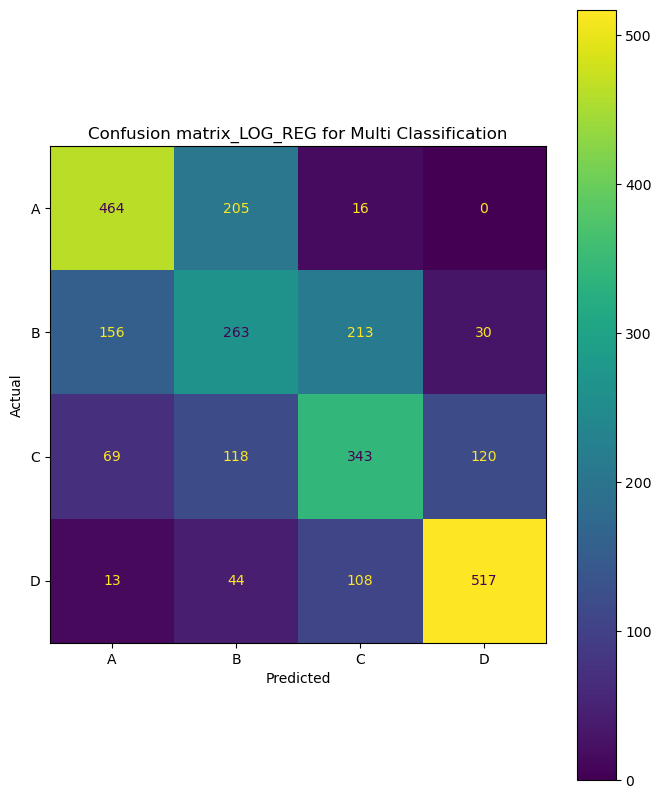

----------------------------------------------------------------------------------------------------------------

Confusion matrix for DTC_TRAIN: 
 [[2663    0    0    0]
 [   0 2685    0    0]
 [   0    0 2699    0]
 [   0    0    0 2667]]
Confusion matrix for DTC_TEST: 
 [[593  83   8   1]
 [133 419  88  22]
 [ 50 109 458  33]
 [  7  39  72 564]]
Accuracy for DTC_TRAIN:  1.0
Accuracy for DTC_TEST:  0.7592385218365062
Precision for DTC_TRAIN:  1.0
Precision for DTC_TEST:  0.7620286756636389
Recall for DTC_TRAIN:  1.0
Recall for DTC_TEST:  0.7592385218365062
Harmonic mean for DTC_TRAIN:  1.0
Harmonic mean for DTC_TEST:  0.7591327683958637
Classification report for DTC_TRAIN: 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00      2663
           B       1.00      1.00      1.00      2685
           C       1.00      1.00      1.00      2699
           D       1.00      1.00      1.00      2667

    accuracy                           1.0

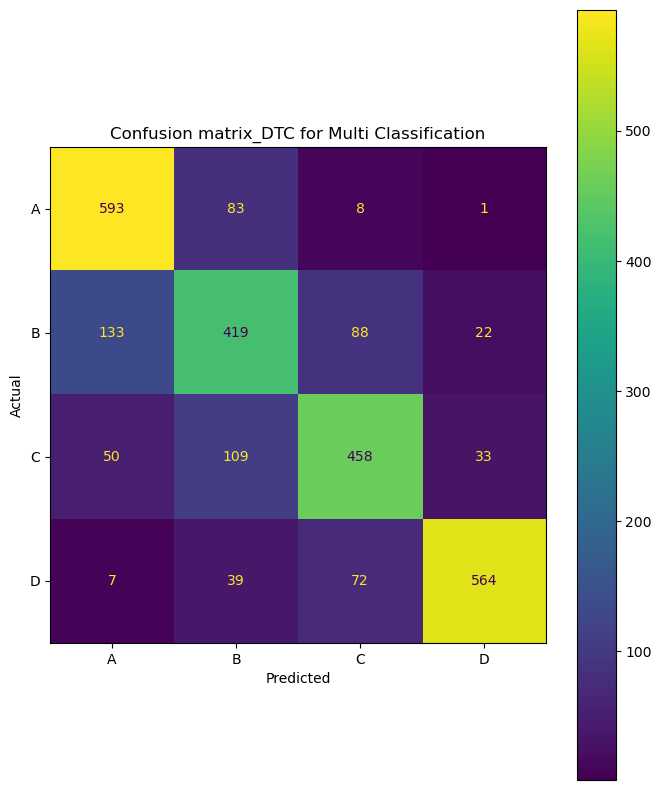

----------------------------------------------------------------------------------------------------------------

Confusion matrix for RFC_TRAIN: 
 [[2663    0    0    0]
 [   0 2685    0    0]
 [   0    0 2699    0]
 [   0    0    0 2667]]
Confusion matrix for RFC_TEST: 
 [[593  83   8   1]
 [133 419  88  22]
 [ 50 109 458  33]
 [  7  39  72 564]]
Accuracy for RFC_TRAIN:  1.0
Accuracy for RFC_TEST:  0.7592385218365062
Precision for RFC_TRAIN:  1.0
Precision for RFC_TEST:  0.7620286756636389
Recall for RFC_TRAIN:  1.0
Recall for RFC_TEST:  0.7592385218365062
Harmonic mean for RFC_TRAIN:  1.0
Harmonic mean for RFC_TEST:  0.7591327683958637
Classification report for RFC_TRAIN: 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00      2663
           B       1.00      1.00      1.00      2685
           C       1.00      1.00      1.00      2699
           D       1.00      1.00      1.00      2667

    accuracy                           1.0

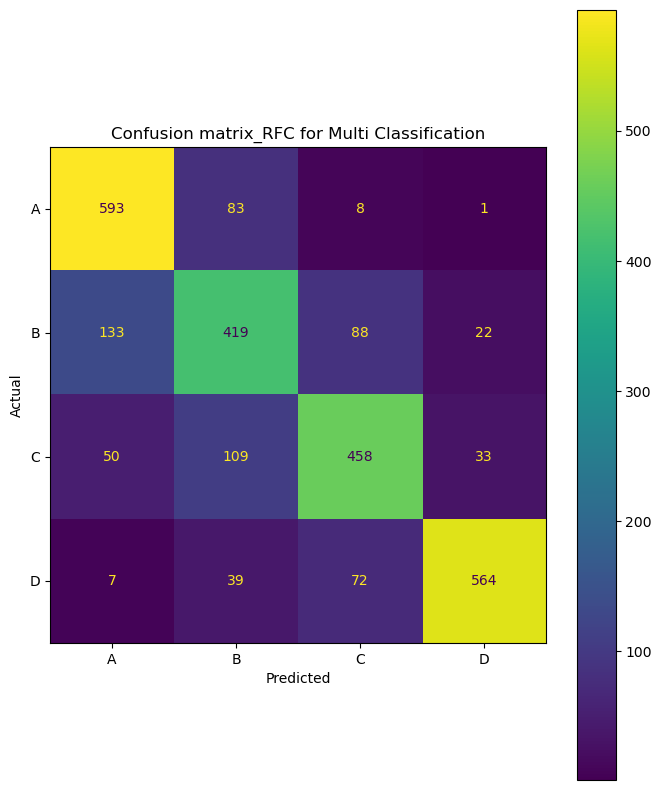

----------------------------------------------------------------------------------------------------------------

Confusion matrix for GNB_TRAIN: 
 [[2008  436   88  131]
 [ 927  816  620  322]
 [ 431  493 1209  566]
 [  83  176  551 1857]]
Confusion matrix for GNB_TEST: 
 [[518 117  31  19]
 [217 207 170  68]
 [ 93 122 294 141]
 [ 29  47 137 469]]
Accuracy for GNB_TRAIN:  0.5497479932798208
Accuracy for GNB_TEST:  0.555431131019037
Precision for GNB_TRAIN:  0.535293514307343
Precision for GNB_TEST:  0.5424699262828936
Recall for GNB_TRAIN:  0.5497479932798208
Recall for GNB_TEST:  0.555431131019037
Harmonic mean for GNB_TRAIN:  0.5367887432041399
Harmonic mean for GNB_TEST:  0.5448059749268698
Classification report for GNB_TRAIN: 
               precision    recall  f1-score   support

           A       0.58      0.75      0.66      2663
           B       0.42      0.30      0.35      2685
           C       0.49      0.45      0.47      2699
           D       0.65      0.70      0

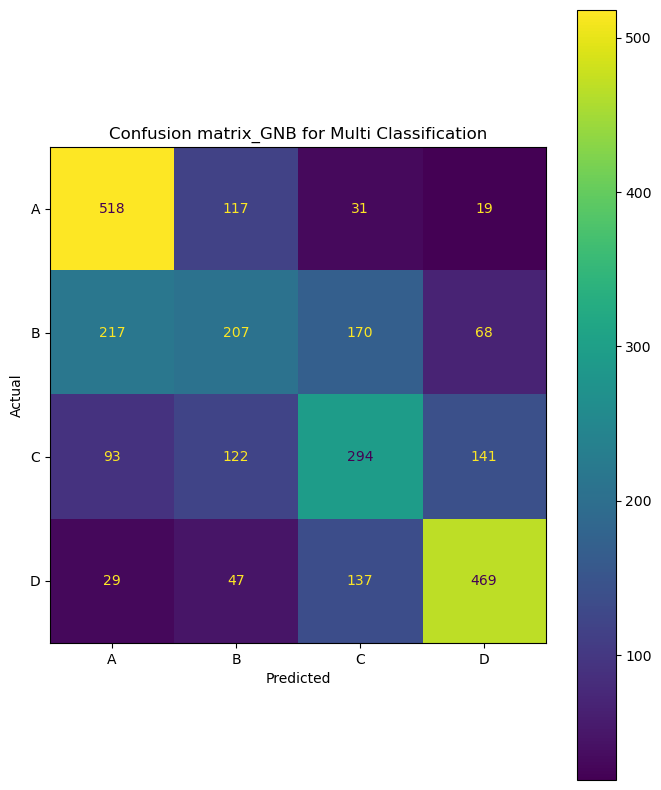

----------------------------------------------------------------------------------------------------------------

Confusion matrix for SVC_RBF_TRAIN: 
 [[1945  663   54    1]
 [ 703 1247  666   69]
 [ 263  634 1462  340]
 [  48  183  512 1924]]
Confusion matrix for SVC_RBF_TEST: 
 [[489 188   8   0]
 [164 286 189  23]
 [ 73 137 351  89]
 [ 15  49 125 493]]
Accuracy for SVC_RBF_TRAIN:  0.6139630390143738
Accuracy for SVC_RBF_TEST:  0.6043299738708473
Precision for SVC_RBF_TRAIN:  0.6198848087615244
Precision for SVC_RBF_TEST:  0.6098025805440015
Recall for SVC_RBF_TRAIN:  0.6139630390143738
Recall for SVC_RBF_TEST:  0.6043299738708473
Harmonic mean for SVC_RBF_TRAIN:  0.6155857771606398
Harmonic mean for SVC_RBF_TEST:  0.6060556167903927
Classification report for SVC_RBF_TRAIN: 
               precision    recall  f1-score   support

           A       0.66      0.73      0.69      2663
           B       0.46      0.46      0.46      2685
           C       0.54      0.54      0.54    

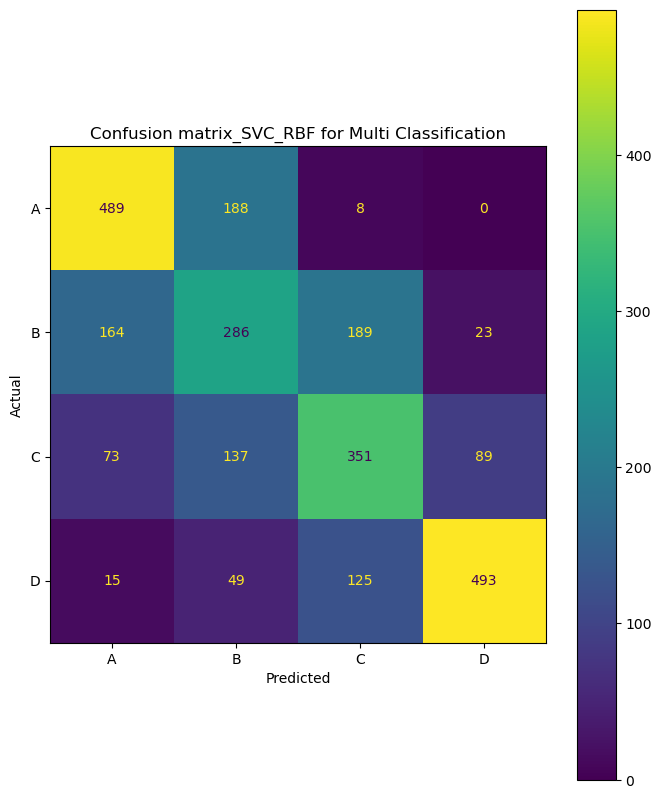

----------------------------------------------------------------------------------------------------------------

Confusion matrix for KNC_TRAIN: 
 [[2340  281   36    6]
 [ 724 1716  223   22]
 [ 354  651 1616   78]
 [  78  257  463 1869]]
Confusion matrix for KNC_TEST: 
 [[530 141  14   0]
 [250 289 103  20]
 [ 88 247 282  33]
 [ 26  80 162 414]]
Accuracy for KNC_TRAIN:  0.7038454358782901
Accuracy for KNC_TEST:  0.5655095184770437
Precision for KNC_TRAIN:  0.7240868523658386
Precision for KNC_TEST:  0.5935668431177422
Recall for KNC_TRAIN:  0.7038454358782901
Recall for KNC_TEST:  0.5655095184770437
Harmonic mean for KNC_TRAIN:  0.7048178799247267
Harmonic mean for KNC_TEST:  0.5687541083042957
Classification report for KNC_TRAIN: 
               precision    recall  f1-score   support

           A       0.67      0.88      0.76      2663
           B       0.59      0.64      0.61      2685
           C       0.69      0.60      0.64      2699
           D       0.95      0.70    

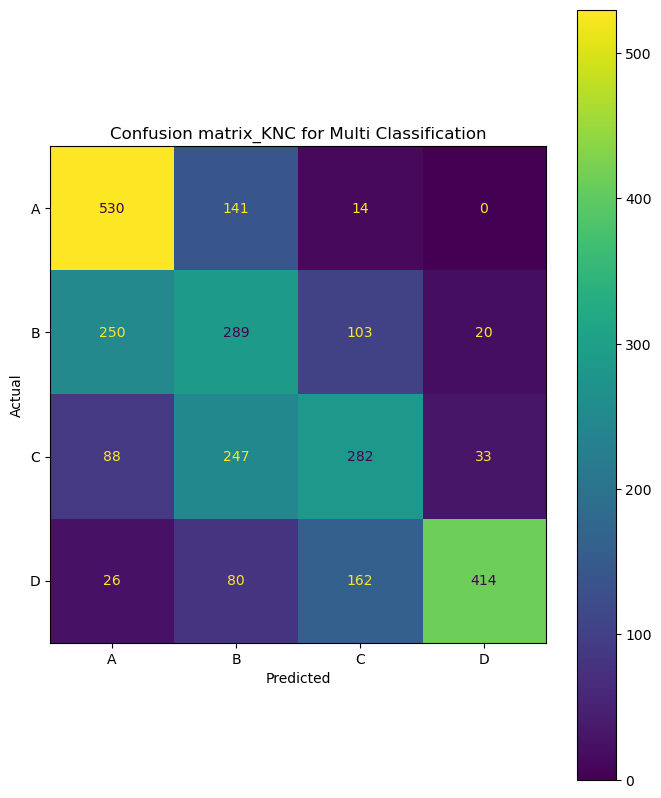

----------------------------------------------------------------------------------------------------------------



In [37]:
# check baseline performance
from sklearn import metrics, svm, tree, ensemble, linear_model, naive_bayes, neighbors


# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model_log_reg = linear_model.LogisticRegression(multi_class='multinomial',
                                                random_state=42) 

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model_dtc = tree.DecisionTreeClassifier(random_state = 42)      
   
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model_rfc = ensemble.RandomForestClassifier(random_state = 42)   
      
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
model_gnb = naive_bayes.GaussianNB() # can't accept random_state

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
model_svc_rbf = svm.SVC(kernel = 'rbf', random_state = 42)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model_kn_classifier = neighbors.KNeighborsClassifier() # can't accept random_state

# Define a list with the names of the classifiers
model_x_list = ['DTC', 'RFC', "GNB", "SVC_RBF", 'KNC']

# Define lists to store the values for the metrics
model_accuracy_train_list = []
model_accuracy_test_list = []

model_precision_train_list = []
model_precision_test_list = []

model_recall_train_list = []
model_recall_test_list = []

model_f1_score_train_list = []
model_f1_score_test_list = []

# define a dictionary with the models

model_dictionary = {'LOG_REG': model_log_reg,
                    'DTC': model_rfc,
                    'RFC': model_rfc,
                    "GNB" : model_gnb,
                    "SVC_RBF" : model_svc_rbf,
                    'KNC': model_kn_classifier}    

# Train different multi-classification models with the training data.
# Make predictions with the train and test data. 
# Calculate metrics. Visualize the confusion matrix for each classifier.

for model_name_key, model_name_value in model_dictionary.items():
        model_name_value.fit(x_train, y_train)
        y_predicted_train = model_name_value.predict(x_train)
        y_predicted_test = model_name_value.predict(x_test)

        # Metrics
        print(f'Confusion matrix for {model_name_key}_TRAIN: \n', metrics.confusion_matrix(y_train, y_predicted_train))
        print(f'Confusion matrix for {model_name_key}_TEST: \n', metrics.confusion_matrix(y_test, y_predicted_test))
        print(f'Accuracy for {model_name_key}_TRAIN: ', metrics.accuracy_score(y_train, y_predicted_train))
        print(f'Accuracy for {model_name_key}_TEST: ', metrics.accuracy_score(y_test, y_predicted_test))
        print(f'Precision for {model_name_key}_TRAIN: ', metrics.precision_score(y_train, y_predicted_train, average = "weighted"))
        print(f'Precision for {model_name_key}_TEST: ', metrics.precision_score(y_test, y_predicted_test, average = "weighted"))
        print(f'Recall for {model_name_key}_TRAIN: ', metrics.recall_score(y_train, y_predicted_train, average = "weighted"))
        print(f'Recall for {model_name_key}_TEST: ', metrics.recall_score(y_test, y_predicted_test, average = "weighted"))
        print(f'Harmonic mean for {model_name_key}_TRAIN: ', metrics.f1_score(y_train, y_predicted_train, average = "weighted"))
        print(f'Harmonic mean for {model_name_key}_TEST: ', metrics.f1_score(y_test, y_predicted_test, average = "weighted"))
        print(f"Classification report for {model_name_key}_TRAIN: \n", metrics.classification_report(y_train, y_predicted_train))
        print(f"Classification report for {model_name_key}_TEST: \n", metrics.classification_report(y_test, y_predicted_test))
        
        model_accuracy_train_list.append(metrics.accuracy_score(y_train, y_predicted_train))
        model_accuracy_test_list.append(metrics.accuracy_score(y_test, y_predicted_test))
                                                               
        model_precision_train_list.append(metrics.precision_score(y_train, y_predicted_train, average = "weighted"))
        model_precision_test_list.append(metrics.precision_score(y_test, y_predicted_test, average = "weighted"))
        
        model_recall_train_list.append(metrics.recall_score(y_train, y_predicted_train, average = "weighted"))
        model_recall_test_list.append(metrics.recall_score(y_test, y_predicted_test, average = "weighted"))
        
        model_f1_score_train_list.append(metrics.f1_score(y_train, y_predicted_train, average = "weighted"))
        model_f1_score_test_list.append(metrics.f1_score(y_test, y_predicted_test, average = "weighted"))
        matrix = metrics.confusion_matrix(y_test, y_predicted_test)
        cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix,
                                             display_labels=["A", "B", "C", "D"]) 
        cmd.plot()
        plt.title(f"Confusion matrix_{model_name_key} for Multi Classification")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()     
        print("----------------------------------------------------------------------------------------------------------------")
        print()

# 3.3 Graphs of the main metrics for comparison 

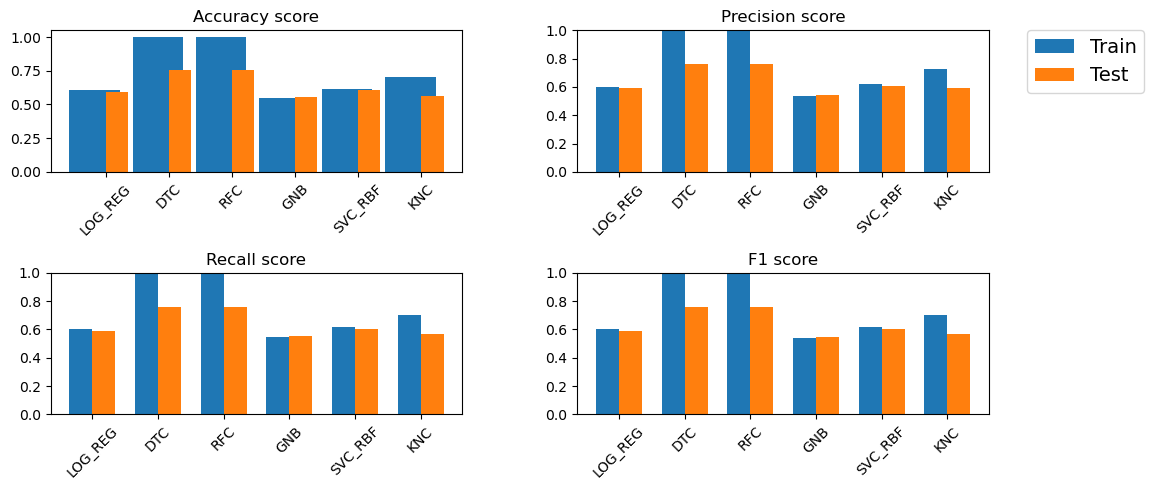

In [38]:
# Create four graphs of grouped bars (training vs test performance for each metric)

model_x_list = ['LOG_REG', 'DTC', 'RFC', "GNB", "SVC_RBF", 'KNC']    
x_value = np.arange(len(model_x_list)) 
width = 0.35

plt.figure(figsize=(10,5))

plt.subplot(221)
plt.title('Accuracy score')
plt.bar(x_value - width/2, model_accuracy_train_list, label='Train')
plt.bar(x_value + width/2, model_accuracy_test_list, width, label='Test')
plt.xticks(x_value, model_x_list, rotation=45)

plt.subplot(222)
plt.subplot(222).set_ylim(0, 1)
plt.title('Precision score')
plt.bar(x_value - width/2, model_precision_train_list, width)
plt.bar(x_value + width/2, model_precision_test_list, width)
plt.xticks(x_value, model_x_list, rotation=45)

plt.subplot(223)
plt.subplot(223).set_ylim(0, 1)
plt.title('Recall score')
plt.bar(x_value - width/2, model_recall_train_list, width)
plt.bar(x_value + width/2, model_recall_test_list, width)
plt.xticks(x_value, model_x_list, rotation=45)

plt.subplot(224)
plt.subplot(224).set_ylim(0, 1)
plt.title('F1 score')
plt.bar(x_value - width/2, model_f1_score_train_list, width)
plt.bar(x_value + width/2, model_f1_score_test_list, width)
plt.xticks(x_value, model_x_list, rotation=45)

plt.figlegend(loc='upper right', ncol=1, labelspacing=0.5, fontsize=14, bbox_to_anchor=(1.15, 0.95))
plt.tight_layout(w_pad=6)
plt.show()

# 3.4 Hyper-parameter tuning with GridSearchCV (using all x features).

Decision Tree Classifier and Random Forest Classifiers are able to over-fit. Can be considered complex enough models that are able to learn the training data. Let's try to regularize them, in such a way that to improve generalization. Let's use the ensemble model - Random Forest Classifier as a potential candidate. Limitation of GridSearchCV - it gives the best score based only on the specified hyper-parameter combinations.

In [39]:
# GridSearchCV - try every combination of hyper-parameters from a given dictionary of values
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Scoring parameters
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

from sklearn.model_selection import GridSearchCV

hyper_parameters_rfc = {"max_depth": (5, 10, 15, 20),
                        'min_samples_split': (2, 4, 6),
                        "min_samples_leaf": (1, 2, 3)}

In [40]:
# This run could some time on less powerful computers.

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model_rfc = ensemble.RandomForestClassifier()   

# Total number of hyper-parameter combinations 4*3*3 = 36
# We can specify, how many times we can train each hyper-parameter combinator on different folds of the data set by the "cv"
# hyper-parameter. If cv = 5, then the total number of fits is 4*3*3*5 = 180

grid_rfc = GridSearchCV(estimator = model_rfc, 
                        param_grid = hyper_parameters_rfc, 
                        cv = 5, 
                        verbose = 1,
                        scoring = "accuracy")
grid_rfc.fit(x_train, y_train)
print("The current grid search cv is: \n", grid_rfc)
print("------------------------------------------------")
print("The best parameters are: ", grid_rfc.best_params_)
print("------------------------------------------------")
print("The best estimator is: ", grid_rfc.best_estimator_)
print("------------------------------------------------")
print("The best score is: ", grid_rfc.best_score_)
print("------------------------------------------------")

# test the model on the test data and compare with the best_estimator_score 
grid_predictions_test = grid_rfc.best_estimator_.predict(x_test)
print("------------------------------------------------")
print(f'Confusion matrix for TEST: \n', metrics.confusion_matrix(y_test, grid_predictions_test))
print(f'Accuracy_TEST: ', metrics.accuracy_score(y_test, grid_predictions_test))
print("Precision_TEST: ", metrics.precision_score(y_test, grid_predictions_test, average = "weighted"))
print(f'Recall_TEST: ', metrics.recall_score(y_test, grid_predictions_test, average = "weighted"))
print(f'Harmonic mean_TEST: ', metrics.f1_score(y_test, grid_predictions_test, average = "weighted"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The current grid search cv is: 
 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': (5, 10, 15, 20),
                         'min_samples_leaf': (1, 2, 3),
                         'min_samples_split': (2, 4, 6)},
             scoring='accuracy', verbose=1)
------------------------------------------------
The best parameters are:  {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4}
------------------------------------------------
The best estimator is:  RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=4)
------------------------------------------------
The best score is:  0.7277391529017891
------------------------------------------------
------------------------------------------------
Confusion matrix for TEST: 
 [[583  95   6   1]
 [134 418  83  27]
 [ 59 106 445  40]
 [  9  33  89 551]]
Accuracy_TEST:  0.7454273982829414
Precision_TEST:  0.

# 4. Repeat the steps in part three above (DROP some of the x features and compare how the models perform).

In [41]:
# define new x data_frame by removing some of the x features (based on the feature ranking)
# drop "systolic", "diastolic", "gender"

x = data_frame[ ["age", "height_cm", "weight_kg", "body fat_%", "gripForce", 
                 "sit and bend forward_cm","sit-ups counts", "broad jump_cm"] ]
y = data_frame["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

Confusion matrix for LOG_REG_TRAIN: 
 [[1920  653   89    1]
 [ 678 1140  778   89]
 [ 255  549 1395  500]
 [  46  157  430 2034]]
Confusion matrix for LOG_REG_TEST: 
 [[460 209  16   0]
 [162 260 208  32]
 [ 72 113 344 121]
 [ 12  45 105 520]]
Accuracy for LOG_REG_TRAIN:  0.6056561508306888
Accuracy for LOG_REG_TEST:  0.5912653975363942
Precision for LOG_REG_TRAIN:  0.6024366936954026
Precision for LOG_REG_TEST:  0.5897829263372586
Recall for LOG_REG_TRAIN:  0.6056561508306888
Recall for LOG_REG_TEST:  0.5912653975363942
Harmonic mean for LOG_REG_TRAIN:  0.6035819830498171
Harmonic mean for LOG_REG_TEST:  0.5903652926214414
Classification report for LOG_REG_TRAIN: 
               precision    recall  f1-score   support

           A       0.66      0.72      0.69      2663
           B       0.46      0.42      0.44      2685
           C       0.52      0.52      0.52      2699
           D       0.78      0.76      0.77      2667

    accuracy                           0.61     1071

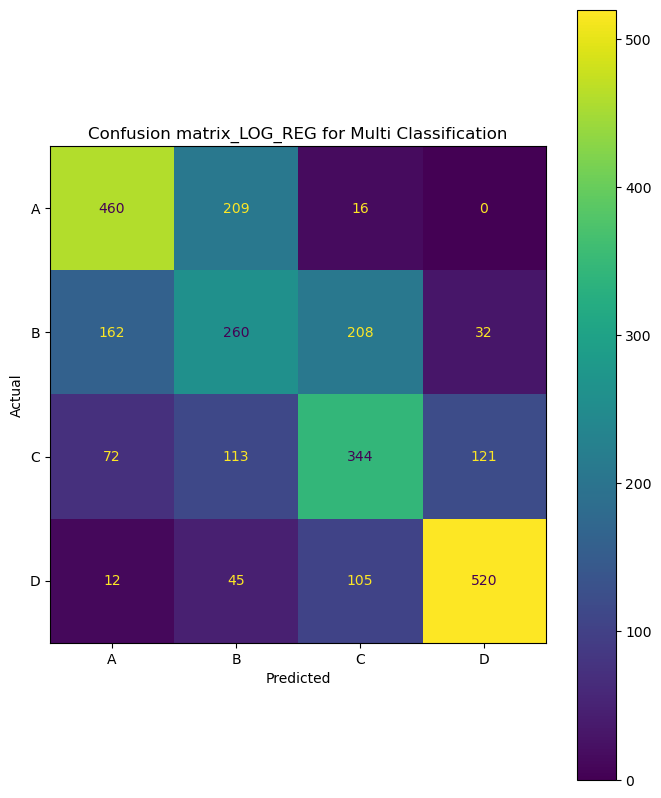

----------------------------------------------------------------------------------------------------------------

Confusion matrix for DTC_TRAIN: 
 [[2663    0    0    0]
 [   0 2685    0    0]
 [   0    0 2699    0]
 [   0    0    0 2667]]
Confusion matrix for DTC_TEST: 
 [[572 106   7   0]
 [141 396  98  27]
 [ 58  97 453  42]
 [  7  41  79 555]]
Accuracy for DTC_TRAIN:  1.0
Accuracy for DTC_TEST:  0.7375886524822695
Precision for DTC_TRAIN:  1.0
Precision for DTC_TEST:  0.7398539063396644
Recall for DTC_TRAIN:  1.0
Recall for DTC_TEST:  0.7375886524822695
Harmonic mean for DTC_TRAIN:  1.0
Harmonic mean for DTC_TEST:  0.737422127300887
Classification report for DTC_TRAIN: 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00      2663
           B       1.00      1.00      1.00      2685
           C       1.00      1.00      1.00      2699
           D       1.00      1.00      1.00      2667

    accuracy                           1.00

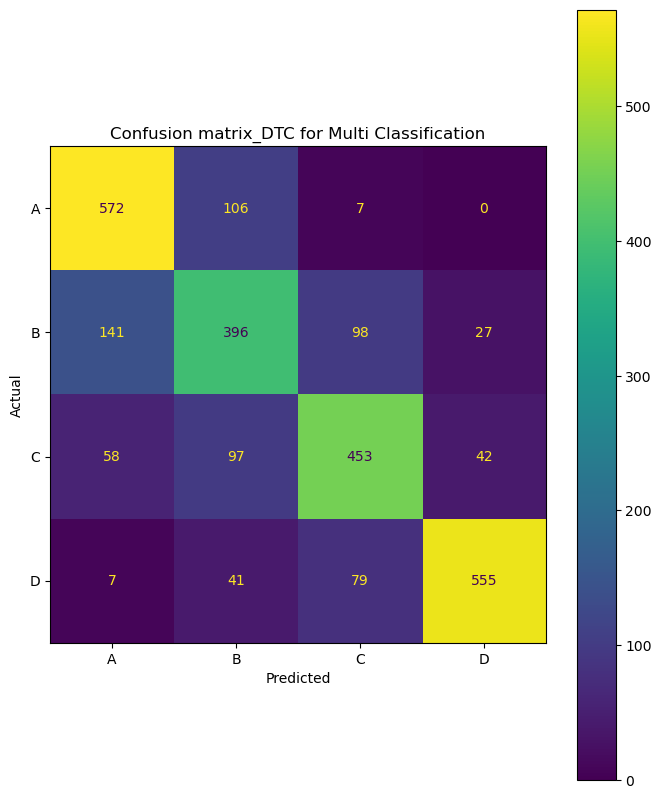

----------------------------------------------------------------------------------------------------------------

Confusion matrix for RFC_TRAIN: 
 [[2663    0    0    0]
 [   0 2685    0    0]
 [   0    0 2699    0]
 [   0    0    0 2667]]
Confusion matrix for RFC_TEST: 
 [[572 106   7   0]
 [141 396  98  27]
 [ 58  97 453  42]
 [  7  41  79 555]]
Accuracy for RFC_TRAIN:  1.0
Accuracy for RFC_TEST:  0.7375886524822695
Precision for RFC_TRAIN:  1.0
Precision for RFC_TEST:  0.7398539063396644
Recall for RFC_TRAIN:  1.0
Recall for RFC_TEST:  0.7375886524822695
Harmonic mean for RFC_TRAIN:  1.0
Harmonic mean for RFC_TEST:  0.737422127300887
Classification report for RFC_TRAIN: 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00      2663
           B       1.00      1.00      1.00      2685
           C       1.00      1.00      1.00      2699
           D       1.00      1.00      1.00      2667

    accuracy                           1.00

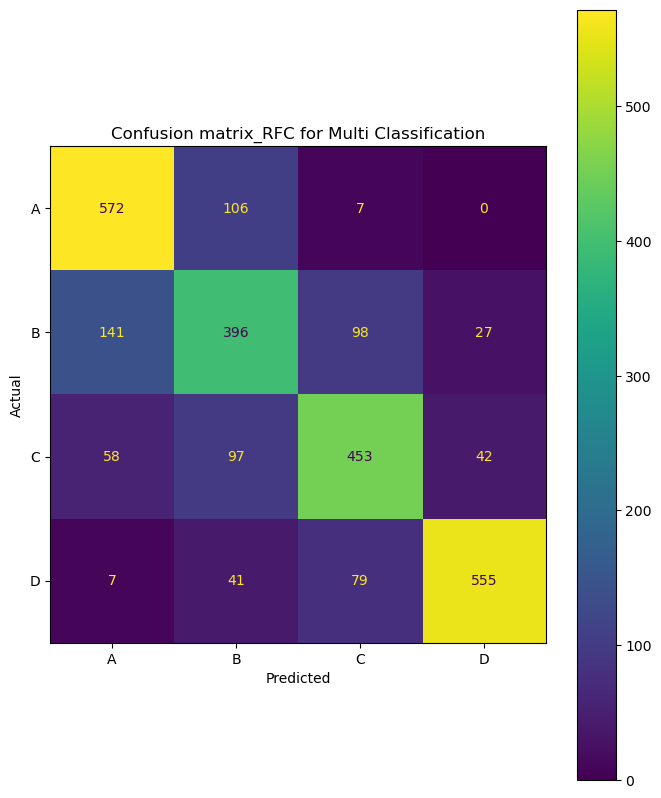

----------------------------------------------------------------------------------------------------------------

Confusion matrix for GNB_TRAIN: 
 [[2014  411  109  129]
 [ 922  781  664  318]
 [ 439  490 1196  574]
 [  95  158  570 1844]]
Confusion matrix for GNB_TEST: 
 [[509 116  38  22]
 [204 219 170  69]
 [100 114 291 145]
 [ 30  38 142 472]]
Accuracy for GNB_TRAIN:  0.5446145230539481
Accuracy for GNB_TEST:  0.5565509518477044
Precision for GNB_TRAIN:  0.5295136906715101
Precision for GNB_TEST:  0.5453709615189833
Recall for GNB_TRAIN:  0.5446145230539481
Recall for GNB_TEST:  0.5565509518477044
Harmonic mean for GNB_TRAIN:  0.5307418877164694
Harmonic mean for GNB_TEST:  0.5468170120963194
Classification report for GNB_TRAIN: 
               precision    recall  f1-score   support

           A       0.58      0.76      0.66      2663
           B       0.42      0.29      0.35      2685
           C       0.47      0.44      0.46      2699
           D       0.64      0.69    

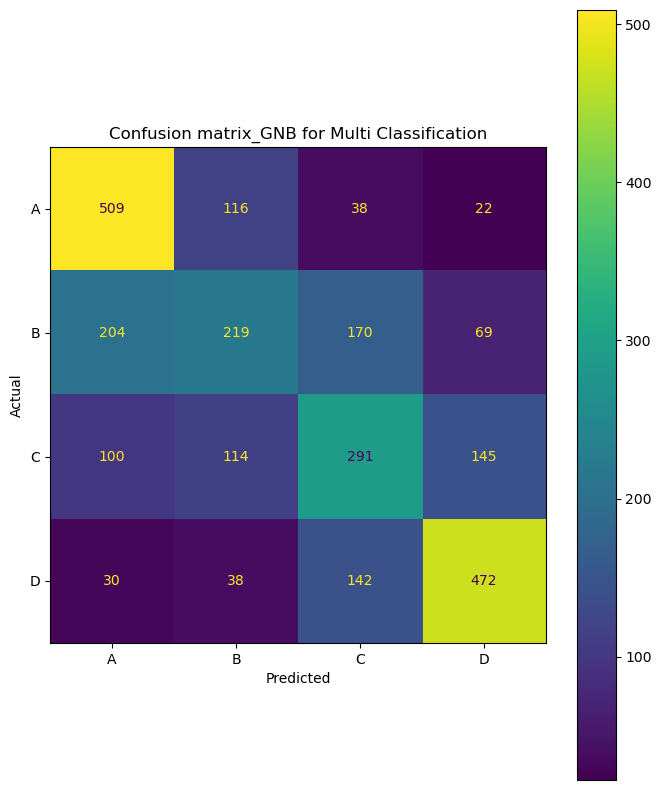

----------------------------------------------------------------------------------------------------------------

Confusion matrix for SVC_RBF_TRAIN: 
 [[1974  635   54    0]
 [ 696 1259  659   71]
 [ 274  623 1477  325]
 [  47  181  532 1907]]
Confusion matrix for SVC_RBF_TEST: 
 [[493 186   6   0]
 [162 287 191  22]
 [ 78 131 356  85]
 [ 14  50 122 496]]
Accuracy for SVC_RBF_TRAIN:  0.6176031360836289
Accuracy for SVC_RBF_TEST:  0.6091825307950728
Precision for SVC_RBF_TRAIN:  0.6237997393129369
Precision for SVC_RBF_TEST:  0.6145535408843731
Recall for SVC_RBF_TRAIN:  0.6176031360836289
Recall for SVC_RBF_TEST:  0.6091825307950728
Harmonic mean for SVC_RBF_TRAIN:  0.6190820245208053
Harmonic mean for SVC_RBF_TEST:  0.6107413635184611
Classification report for SVC_RBF_TRAIN: 
               precision    recall  f1-score   support

           A       0.66      0.74      0.70      2663
           B       0.47      0.47      0.47      2685
           C       0.54      0.55      0.54    

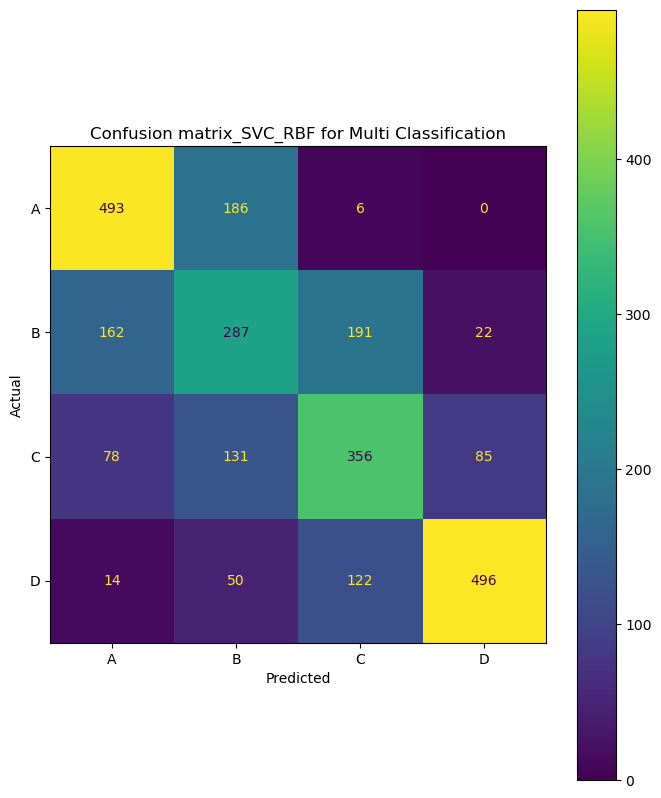

----------------------------------------------------------------------------------------------------------------

Confusion matrix for KNC_TRAIN: 
 [[2388  246   25    4]
 [ 703 1735  215   32]
 [ 290  598 1729   82]
 [  61  216  433 1957]]
Confusion matrix for KNC_TEST: 
 [[562 113  10   0]
 [227 314 106  15]
 [ 78 221 315  36]
 [ 21  54 158 449]]
Accuracy for KNC_TRAIN:  0.7288594362516334
Accuracy for KNC_TEST:  0.6121687196715192
Precision for KNC_TRAIN:  0.7441087077066605
Precision for KNC_TEST:  0.630717479233318
Recall for KNC_TRAIN:  0.7288594362516334
Recall for KNC_TEST:  0.6121687196715192
Harmonic mean for KNC_TRAIN:  0.7293679614101977
Harmonic mean for KNC_TEST:  0.6132541892716479
Classification report for KNC_TRAIN: 
               precision    recall  f1-score   support

           A       0.69      0.90      0.78      2663
           B       0.62      0.65      0.63      2685
           C       0.72      0.64      0.68      2699
           D       0.94      0.73     

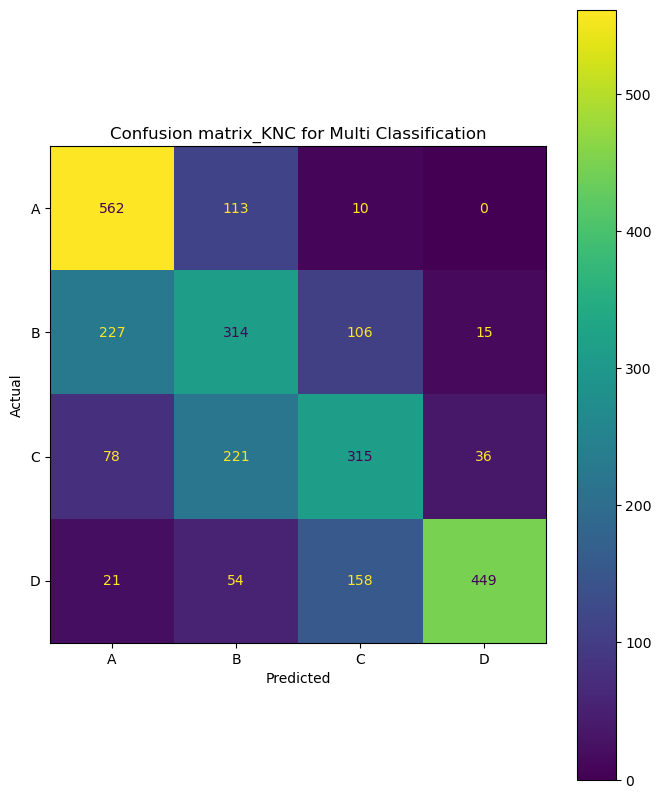

----------------------------------------------------------------------------------------------------------------



In [42]:
from sklearn import metrics, svm, tree, ensemble, linear_model, naive_bayes, neighbors

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model_log_reg = linear_model.LogisticRegression(multi_class='multinomial',
                                                random_state=42) 

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model_dtc = tree.DecisionTreeClassifier(random_state = 42)      
   
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model_rfc = ensemble.RandomForestClassifier(random_state = 42)   
      
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
model_gnb = naive_bayes.GaussianNB() # can't accept random_state

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
model_svc_rbf = svm.SVC(kernel = 'rbf', random_state = 42)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model_kn_classifier = neighbors.KNeighborsClassifier() # can't accept random_state

# Define a list with the names of the classifiers
model_x_list = ['DTC', 'RFC', "GNB", "SVC_RBF", 'KNC']

# Define lists to store the values for the metrics
model_accuracy_train_list = []
model_accuracy_test_list = []

model_precision_train_list = []
model_precision_test_list = []

model_recall_train_list = []
model_recall_test_list = []

model_f1_score_train_list = []
model_f1_score_test_list = []

# define a dictionary with the models

model_dictionary = {'LOG_REG': model_log_reg,
                    'DTC': model_rfc,
                    'RFC': model_rfc,
                    "GNB" : model_gnb,
                    "SVC_RBF" : model_svc_rbf,
                    'KNC': model_kn_classifier}    

# Train different multi-classification models with the training.
# Make predictions with the train and test data. Calculate metrics.

for model_name_key, model_name_value in model_dictionary.items():
        model_name_value.fit(x_train, y_train)
        y_predicted_train = model_name_value.predict(x_train)
        y_predicted_test = model_name_value.predict(x_test)

        # Metrics
        print(f'Confusion matrix for {model_name_key}_TRAIN: \n', metrics.confusion_matrix(y_train, y_predicted_train))
        print(f'Confusion matrix for {model_name_key}_TEST: \n', metrics.confusion_matrix(y_test, y_predicted_test))
        print(f'Accuracy for {model_name_key}_TRAIN: ', metrics.accuracy_score(y_train, y_predicted_train))
        print(f'Accuracy for {model_name_key}_TEST: ', metrics.accuracy_score(y_test, y_predicted_test))
        print(f'Precision for {model_name_key}_TRAIN: ', metrics.precision_score(y_train, y_predicted_train, average = "weighted"))
        print(f'Precision for {model_name_key}_TEST: ', metrics.precision_score(y_test, y_predicted_test, average = "weighted"))
        print(f'Recall for {model_name_key}_TRAIN: ', metrics.recall_score(y_train, y_predicted_train, average = "weighted"))
        print(f'Recall for {model_name_key}_TEST: ', metrics.recall_score(y_test, y_predicted_test, average = "weighted"))
        print(f'Harmonic mean for {model_name_key}_TRAIN: ', metrics.f1_score(y_train, y_predicted_train, average = "weighted"))
        print(f'Harmonic mean for {model_name_key}_TEST: ', metrics.f1_score(y_test, y_predicted_test, average = "weighted"))
        print(f"Classification report for {model_name_key}_TRAIN: \n", metrics.classification_report(y_train, y_predicted_train))
        print(f"Classification report for {model_name_key}_TEST: \n", metrics.classification_report(y_test, y_predicted_test))
        
        model_accuracy_train_list.append(metrics.accuracy_score(y_train, y_predicted_train))
        model_accuracy_test_list.append(metrics.accuracy_score(y_test, y_predicted_test))
                                                                       
        model_precision_train_list.append(metrics.precision_score(y_train, y_predicted_train, average = "weighted"))
        model_precision_test_list.append(metrics.precision_score(y_test, y_predicted_test, average = "weighted"))
        
        model_recall_train_list.append(metrics.recall_score(y_train, y_predicted_train, average = "weighted"))
        model_recall_test_list.append(metrics.recall_score(y_test, y_predicted_test, average = "weighted"))
        
        model_f1_score_train_list.append(metrics.f1_score(y_train, y_predicted_train, average = "weighted"))
        model_f1_score_test_list.append(metrics.f1_score(y_test, y_predicted_test, average = "weighted"))
        matrix = metrics.confusion_matrix(y_test, y_predicted_test)
        cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix,
                                             display_labels=["A", "B", "C", "D"]) 
        cmd.plot()
        plt.title(f"Confusion matrix_{model_name_key} for Multi Classification")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()     
        print("----------------------------------------------------------------------------------------------------------------")
        print()

# Graphs of the metrics for comparison 

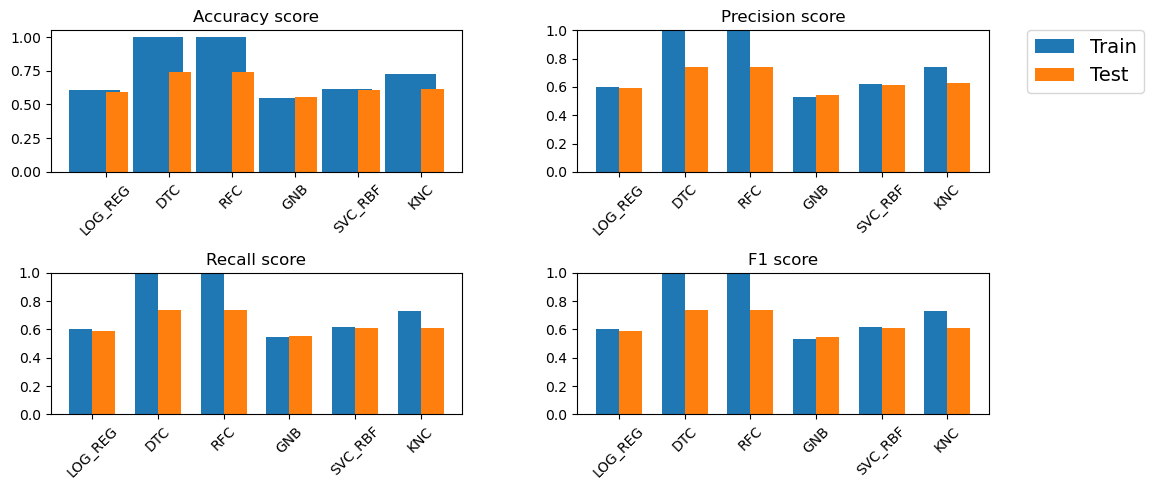

In [43]:
model_x_list = ['LOG_REG', 'DTC', 'RFC', "GNB", "SVC_RBF", 'KNC']    
x_value = np.arange(len(model_x_list)) 
width = 0.35

plt.figure(figsize=(10,5))

plt.subplot(221)
plt.title('Accuracy score')
plt.bar(x_value - width/2, model_accuracy_train_list, label='Train')
plt.bar(x_value + width/2, model_accuracy_test_list, width, label='Test')
plt.xticks(x_value, model_x_list, rotation=45)

plt.subplot(222)
plt.subplot(222).set_ylim(0, 1)
plt.title('Precision score')
plt.bar(x_value - width/2, model_precision_train_list, width)
plt.bar(x_value + width/2, model_precision_test_list, width)
plt.xticks(x_value, model_x_list, rotation=45)

plt.subplot(223)
plt.subplot(223).set_ylim(0, 1)
plt.title('Recall score')
plt.bar(x_value - width/2, model_recall_train_list, width)
plt.bar(x_value + width/2, model_recall_test_list, width)
plt.xticks(x_value, model_x_list, rotation=45)

plt.subplot(224)
plt.subplot(224).set_ylim(0, 1)
plt.title('F1 score')
plt.bar(x_value - width/2, model_f1_score_train_list, width)
plt.bar(x_value + width/2, model_f1_score_test_list, width)
plt.xticks(x_value, model_x_list, rotation=45)

plt.figlegend(loc='upper right', ncol=1, labelspacing=0.5, fontsize=14, bbox_to_anchor=(1.15, 0.95))
plt.tight_layout(w_pad=6)
plt.show()

# Grid Search (after dropping some of the x features).

Again Decision Tree Classifier and Random Forest Classifier are able to over-fit. Can be considered complex enough models that are able to learn the data. Let's use an ensemble method RFC and regularize it, in such a way that to improve generalization. Try the same hyper-parameter combination.

In [44]:
from sklearn.model_selection import GridSearchCV

hyper_parameters_rfc = {"max_depth": (5, 10, 15, 20),
                        'min_samples_split': (2, 4, 6),
                        "min_samples_leaf": (1, 2, 3)}

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

model_rfc = ensemble.RandomForestClassifier()   

grid_rfc = GridSearchCV(estimator = model_rfc, 
                        param_grid = hyper_parameters_rfc, 
                        cv = 5, 
                        verbose = 1,
                        scoring = "accuracy")
grid_rfc.fit(x_train, y_train)
print("The current grid search cv is: \n", grid_rfc)
print("------------------------------------------------")
print("The best parameters are: ", grid_rfc.best_params_)
print("------------------------------------------------")
print("The best estimator is: ", grid_rfc.best_estimator_)
print("------------------------------------------------")
print("The best score is: ", grid_rfc.best_score_)
print("------------------------------------------------")

grid_predictions_test = grid_rfc.best_estimator_.predict(x_test)
print("------------------------------------------------")
print(f'Confusion matrix for TEST: \n', metrics.confusion_matrix(y_test, grid_predictions_test))
print(f'Accuracy_TEST: ', metrics.accuracy_score(y_test, grid_predictions_test))
print("Precision_TEST: ", metrics.precision_score(y_test, grid_predictions_test, average = "weighted"))
print(f'Recall_TEST: ', metrics.recall_score(y_test, grid_predictions_test, average = "weighted"))
print(f'Harmonic mean_TEST: ', metrics.f1_score(y_test, grid_predictions_test, average = "weighted"))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The current grid search cv is: 
 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': (5, 10, 15, 20),
                         'min_samples_leaf': (1, 2, 3),
                         'min_samples_split': (2, 4, 6)},
             scoring='accuracy', verbose=1)
------------------------------------------------
The best parameters are:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4}
------------------------------------------------
The best estimator is:  RandomForestClassifier(max_depth=20, min_samples_split=4)
------------------------------------------------
The best score is:  0.7269931895607831
------------------------------------------------
------------------------------------------------
Confusion matrix for TEST: 
 [[562 116   6   1]
 [140 398  96  28]
 [ 57 101 447  45]
 [  7  40  76 559]]
Accuracy_TEST:  0.7338559163867114
Precision_TEST:  0.7360869573124335
Rec

# Compare GridSearchCV RFC models (all x features vs after dropping some x features)

The model with the smaller number of x features performs simillarly (slightly worse) on accuracy, precision, recall and F1 compared with
the model with all features. 

ALL X FEATURES:
    
Accuracy_TEST:  0.7454273982829414, Precision_TEST:  0.7482300863166526, Recall_TEST:  0.7454273982829414, Harmonic mean_TEST:  0.7452935350027877

AFTER DROPPING SOME X FEATURES:

Accuracy_TEST:  0.7338559163867114, Precision_TEST:  0.7360869573124335, Recall_TEST:  0.7338559163867114, Harmonic mean_TEST:  0.7339816839057216
    
May be the simpler model could be used because it has smaller dimensionality.

# 5. Clustering algorithm (using all x features).


Inertia list values:  [19262866.33487853, 15309469.719756708, 13210658.276416384, 12042899.919473886, 11286319.330870744, 10626676.745194735, 10118758.937177705, 9683034.66112113, 9358673.919388026]

Scores list values:  [-19262866.334878527, -15309469.719756708, -13210658.276416382, -12042899.919473885, -11286319.330870744, -10626676.745194735, -10118758.937177703, -9683034.661121132, -9358673.91938803]

Silhouette score values:  [0.3894047662649143, 0.2824210949553976, 0.2540983882150967, 0.2165691268256541, 0.19069645232526874, 0.1831328061623255, 0.17730516136155328, 0.17378876515382682, 0.16160220404974876]

Cluster center values: 
 [[5.46842105e+01 1.59338630e+02 6.03634757e+01 3.01985835e+01
  8.34965243e+01 1.39305859e+02 2.66219265e+01 1.57422542e+01
  2.18782522e+01 1.40175770e+02 1.85700099e-01]
 [5.60405954e+01 1.69386536e+02 7.05519486e+01 2.29871417e+01
  8.46217862e+01 1.40143437e+02 3.94566982e+01 1.18161434e+01
  3.30811908e+01 1.83140731e+02 9.64140731e-01]
 [3.508061

Text(0, 0.5, 'Silhouette Score')

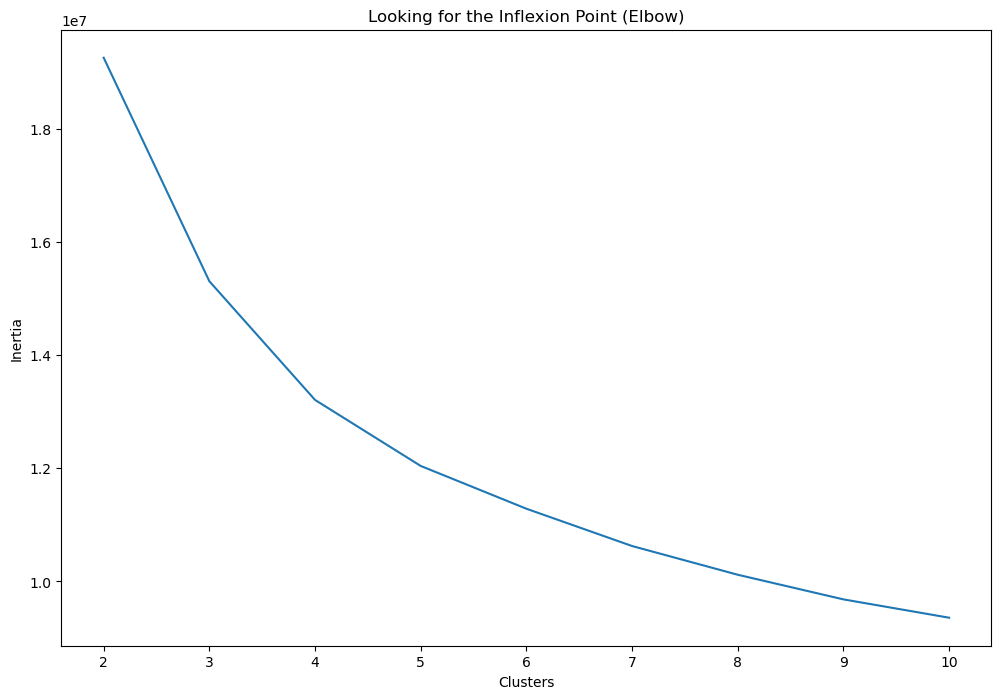

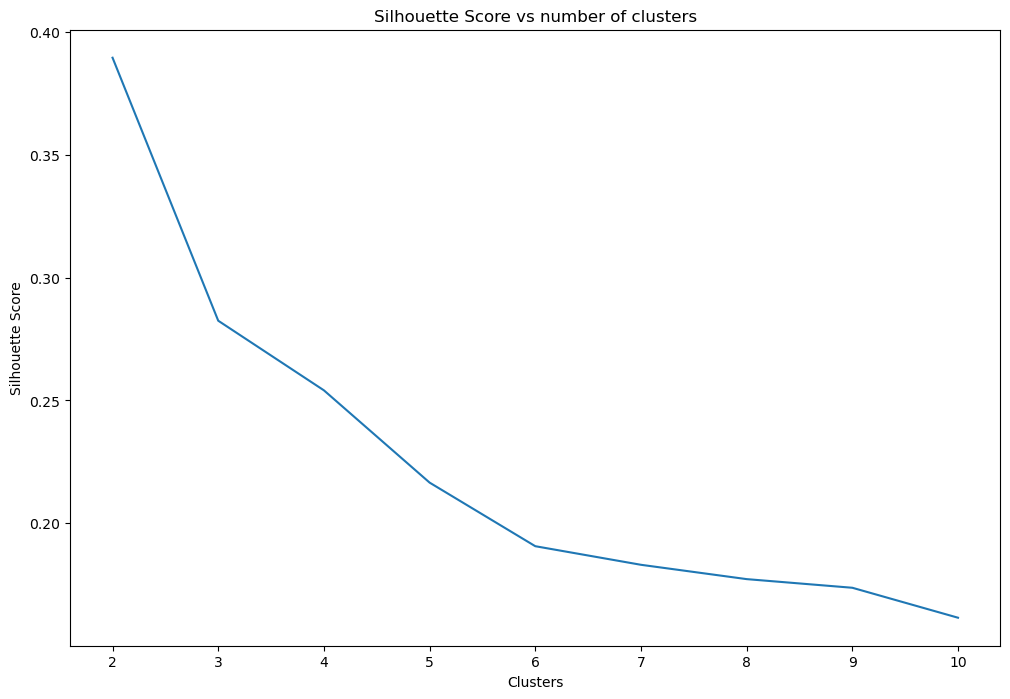

In [46]:
# Running K_Means to see if the data can be clustered into 4 separate groups

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = data_frame[["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", 
                "sit and bend forward_cm","sit-ups counts", "broad jump_cm", "Gender"]]
y = data_frame[["class"]]

# define empty lists to store different scores
inertia_list = []
score_list = []
silhouette_score_list = []

# To avoid: ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive),
# we start at i=2

for i in range(2, 11):
    k_means_model = KMeans(n_clusters=i)
    y_predicted_train = k_means_model.fit_predict(x) 
    inertia_list.append(k_means_model.inertia_)
    score_list.append(k_means_model.score(x))
    silhouette_score_list.append(silhouette_score(x, k_means_model.labels_))
    
print("Inertia list values: ", inertia_list)
print()
print("Scores list values: ", score_list)
print()
print("Silhouette score values: ", silhouette_score_list)
print()
print("Cluster center values: \n", k_means_model.cluster_centers_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = list(range(2, 11)), 
             y = inertia_list,
             ax = ax)
ax.set_title('Looking for the Inflexion Point (Elbow)')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Looking for that point at which the inertia value starts to decrease much more slowly
# Not very clear, it could be 3, 4, 5 or 6 number of clusters. May be data may not be separated very clearly with K-means
# Next, check silhouette score

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x= list(range(2, 11)), 
             y= silhouette_score_list, 
             ax= ax)
ax.set_title('Silhouette Score vs number of clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

# Silhouette score reaches a max value at n = 2

# Clustering algorithm (drop some x features). Compare perforamance.

Inertia list values:  [14953431.77930906, 10968832.016271835, 9245400.626381427, 8193919.6036629025, 7453327.074364054, 6988439.042027003, 6615170.325668046, 6255129.779917613, 6014384.424835786]

Scores list values:  [-14953431.77930906, -10968832.016271835, -9245400.626381427, -8193919.6036629025, -7453327.074364053, -6988439.042027002, -6615170.325668046, -6255129.779917613, -6014384.424835785]

Silhouette score values:  [0.4373445837223922, 0.3396945720157051, 0.2782553611552007, 0.26770236794267366, 0.24467100006980322, 0.22472803253856927, 0.20652813522240665, 0.20521523008251752, 0.19514214820841969]

Cluster center values: 
 [[ 28.6795017  171.3797282   67.25278029  17.79318702  41.44201586
   14.81217441  50.1608154  220.90996602]
 [ 50.07506702 158.3863941   57.62399464  30.6581483   24.36808311
   15.7724866   20.89571046 134.66756032]
 [ 30.99009901 161.75173267  56.24402228  27.42165428  26.25358911
   18.59019183  34.2549505  156.86509901]
 [ 27.71686047 175.4252907   73.

Text(0, 0.5, 'Silhouette Score')

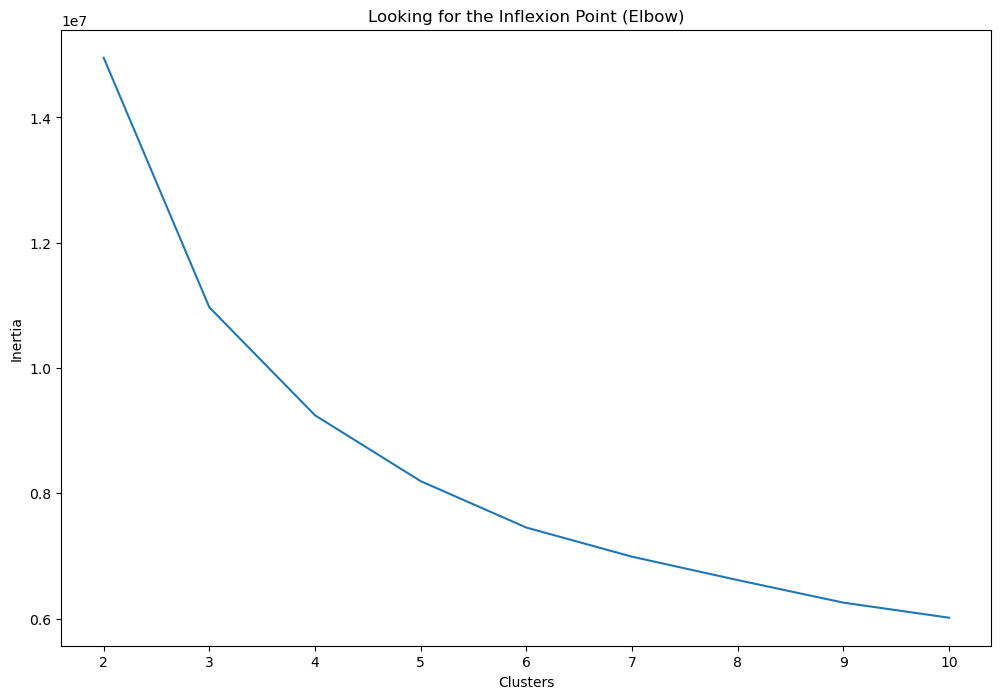

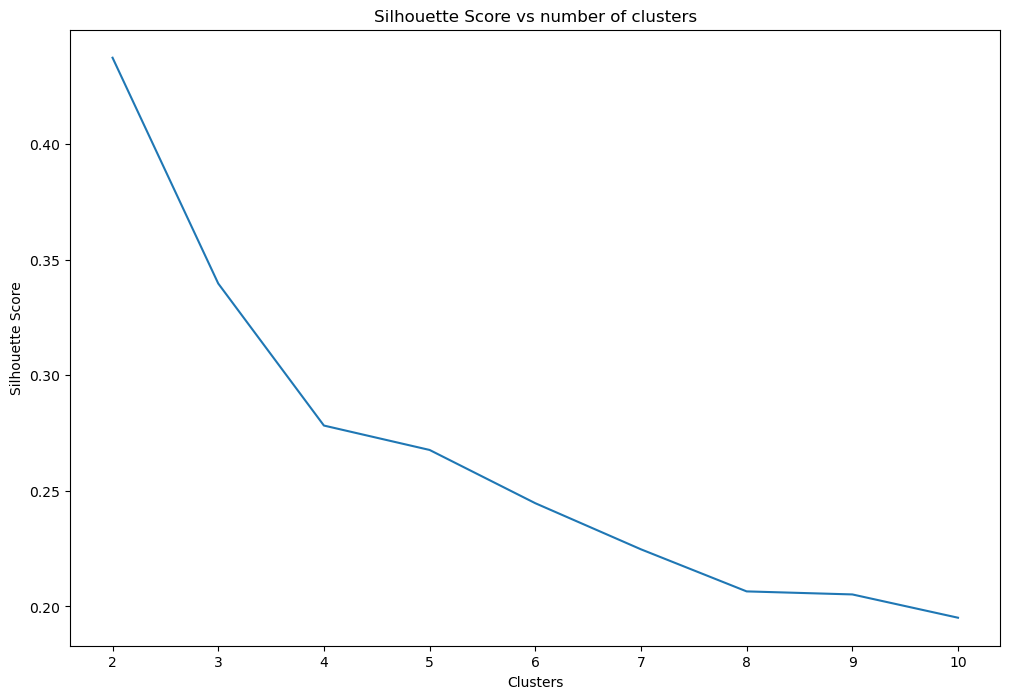

In [47]:
# if we drop some of the x features (based on the feature ranking), can we see clearer clustering?

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = data_frame[ ["age", "height_cm", "weight_kg", "body fat_%", "gripForce", 
                 "sit and bend forward_cm","sit-ups counts", "broad jump_cm"] ]
y = data_frame["class"]

# define empty lists to store different scores
inertia_list = []
score_list = []
silhouette_score_list = []

# To avoid: ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
# we start at i=2

for i in range(2, 11):
    k_means_model = KMeans(n_clusters=i)
    y_predicted_train = k_means_model.fit_predict(x) 
    inertia_list.append(k_means_model.inertia_)
    score_list.append(k_means_model.score(x))
    silhouette_score_list.append(silhouette_score(x, k_means_model.labels_))
    
print("Inertia list values: ", inertia_list)
print()
print("Scores list values: ", score_list)
print()
print("Silhouette score values: ", silhouette_score_list)
print()
print("Cluster center values: \n", k_means_model.cluster_centers_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = list(range(2, 11)), 
             y = inertia_list,
             ax = ax)
ax.set_title('Looking for the Inflexion Point (Elbow)')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Looking for that point at which the inertia value starts to decrease much more slowly
# Not very clear, it could be 3, 4, 5 or 6 number of clusters. May be data may not be separated very clearly with K-means
# Next, check silhouette score

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x= list(range(2, 11)), 
             y= silhouette_score_list, 
             ax= ax)
ax.set_title('Silhouette Score vs number of clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

# Silhoette score again max at n = 2

# Compare clustering algorithm perforamance

Based on the K-means algorithm comparison (leaving all x features or removing some of them) doesn't seem to improve
the clustering into four separate groups. According to the silhouette score values an optimal value of n is 2, while 
according to the intertia the value of n could be 3, 4, 5 or 6. It seems that data cannot be separated in 4 perfectly
separated clusters.